<a href="https://colab.research.google.com/github/Cavalheiro93/mvp-data-analyst-global-ai-market/blob/main/Projeto_MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global AI Job Market & Salary Trends 2025

AI Job Market Analysis Dataset 2025. Retrieved from Kaggle.com

## 💠 Definição do Problema

### 🔹 Introdução

Com o grande avanço da Inteligência Artificial, o mercado de trabalho tem passado por transformações significativas em escala global. Novas funções, cargos e áreas de atuação vêm surgindo rapidamente, acompanhadas por uma crescente demanda por profissionais qualificados em diversas especialidades não só de IA, mas também de Dados.

Essa movimentação tem impulsionado contratações nacionais e internacionais, promovendo a mobilidade de talentos e o trabalho remoto como tendência. Empresas de diferentes segmentos, portes e regiões estão disputando profissionais capacitados, o que abre espaço para análises sobre desigualdade salarial, tendências de contratação e habilidades mais requisitadas.

Este projeto tem como objetivo analisar as principais tendências do mercado global e nacional.

**Questões investigadas:**

- Quais áreas de atuação estão em maior crescimento?
- Quais regiões estão contratando em maior escala?
- Quais são as principais habilidades técnicas exigidas Globalmente? E Nacionalmente?
- Como estão distribuídos os salários globalmente?

**Premissas e hipóteses:**

- Países europeus (principalmente Dinamarca, Suíça ou Suécia) terão os melhores salários e benefícios.
- Haverá mais vagas nos EUA do que nos demais países.
- Python e SQL devem ser as habilidades mais requisitadas do mercado.
- No mercado brasileiro, deve haver uma grande tendência na área de Analista de Dados.
- Grande parte das empresas no Brasil deverá ser do ramo da tecnologia.

### 🔹 Estrutura dos Dados

Para o projeto, estamos trabalhando com dois datasets diferentes:

- `ai_job_dataset.csv` → Dados referentes ao mercado global. O dataset está muito bem estruturado e não foram identificados valores duplicados ou campos vazios.

- `job_data_cache.pkl` → Dados referentes ao mercado brasileiro. Embora haja uma quantidade significativa de registros, não há informações importantes como salário, graduação e experiência necessária, entre outras. Além disso, será necessário fazer um tratamento nesses dados para poder juntar com os dados globais e trabalhar com um unico Dataframe

### 🔹 Dicionário de Dados - AI Job Dataset

| Coluna                  | Descrição (PT-BR)                                                                 | Tipo     |
|------------------------|------------------------------------------------------------------------------------|----------|
| `job_id`               | Identificador único para cada vaga                                                | String   |
| `job_title`            | Título padronizado do cargo                                                       | String   |
| `salary_usd`           | Salário anual em dólares (USD)                                                    | Integer  |
| `salary_currency`      | Moeda original do salário                                                         | String   |
| `experience_level`     | Nível de experiência (EN = Júnior, MI = Pleno, SE = Sênior, EX = Executivo)       | String   |
| `employment_type`      | Tipo de contratação (FT = Tempo Integral, PT = Meio Período, CT = Contrato, FL = Freelancer) | String |
| `company_location`     | País onde está localizada a empresa                                               | String   |
| `company_size`         | Porte da empresa (S = Pequena <50, M = Média 50-250, L = Grande >250)             | String   |
| `employee_residence`   | País de residência do funcionário                                                 | String   |
| `remote_ratio`         | Nível de trabalho remoto (0 = Presencial, 50 = Híbrido, 100 = Remoto Total)       | Integer  |
| `required_skills`      | Top 5 habilidades exigidas (separadas por vírgula)                                | String   |
| `education_required`   | Nível mínimo de escolaridade exigido                                              | String   |
| `years_experience`     | Anos de experiência exigidos                                                      | Integer  |
| `industry`             | Setor de atuação da empresa                                                       | String   |
| `posting_date`         | Data em que a vaga foi publicada                                                  | Date     |
| `application_deadline`| Prazo final para candidatura                                                      | Date     |
| `job_description_length`| Quantidade de caracteres da descrição da vaga                                   | Integer  |
| `benefits_score`       | Pontuação numérica do pacote de benefícios (1 a 10)                               | Float    |
| `company_name`       | Nome da Empresa                               | String    |


### 🔹 Fonte de Dados

A seguir, seguiremos com nosso estudo, com o propósito de tentar responder todas essas questões utilizando análise de dados e boas práticas.

- **Dados Globais:** [Kaggle - Global AI Job Market and Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025)
- **Dados Brasil:** [GitHub - LinkedIn Jobs Analysis](https://github.com/sch-paulo/linkedin_jobs_analysis/tree/main/data/cache)

---

## 🔶 Importação das Bibliotecas

Como estamos trabalhando com arquivos diferentes, foi necessário realizar uma série de tratamentos para adequar os dados do Brasil ao formato do dataset global.

No total, foram quase 300 linhas de código dedicadas ao processo de padronização. No entanto, foi uma ótima oportunidade para aplicar as lições do terceiro módulo de **Engenharia de Software** e da Sprint adicional **Programação Orientada a Objetos**.

Para isso foi criado o arquivo `TratamentoDeDados.py`, contendo classes que centralizam responsabilidades específicas.

In [1]:
# Apaga o arquivo antigo local (se existir)
!rm TratamentoDeDados.py
# Baixa a nova versão
!wget --no-cache https://raw.githubusercontent.com/Cavalheiro93/mvp-data-analyst-global-ai-market/refs/heads/main/TratamentoDeDados.py

import pandas as pd
import requests
from io import BytesIO
import importlib
import TratamentoDeDados
importlib.reload(TratamentoDeDados)
# Importando os Módulos
from TratamentoDeDados import PadronizacaoDadosBrasil, LimpezaInicialDados, LimpezaFinalDados, GeradorSkillsPorCategoria
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from seaborn import color_palette
from warnings import filterwarnings
filterwarnings('ignore')

'rm' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'wget' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


## 🔶 Criação dos DataFrames

Inicialmente tinhamos apenas as informações do Mercado Global, mas coincidentemente depois encontrei um post no Linkedin feito pelo **Sr. Paulo Schmitz Junior** (autor que gerou esses dados do Brasil). Assim passamos a usar também esssa base para o projeto.

https://www.linkedin.com/posts/paulo-schmitz-junior_analisei-mais-de-5000-vagas-da-%C3%A1rea-de-dados-activity-7343276770411929601-06vE/?utm_medium=ios_app&rcm=ACoAACe4aOoBgrazyosYOj1k74g0Z44dvjeEN5M&utm_source=social_share_send&utm_campaign=copy_link


Por garantia, implementamos um bloco `try` e `except` para se caso a URL original dos dados seja alterada, ele busque uma URL alternativa que tenha os mesmos dados só que no nosso repositório no GitHub.

In [2]:
file_path_global = r"https://raw.githubusercontent.com/Cavalheiro93/mvp-data-analyst-global-ai-market/refs/heads/main/source/ai_job_dataset.csv"
file_path_brasil = r'https://raw.githubusercontent.com/Cavalheiro93/mvp-data-analyst-global-ai-market/main/source/job_data_cache.xlsx'
url_brasil_pkl = r'https://raw.githubusercontent.com/sch-paulo/linkedin_jobs_analysis/main/data/cache/job_data_cache.pkl'

# Tenta importar os dados da url orginal
try:
    # Baixa os bytes do pickle
    response = requests.get(url_brasil_pkl)
    response.raise_for_status()

    # Leitura do arquivo pickle
    df_brasil = pd.read_pickle(BytesIO(response.content))

    # Transforma apenas os valores do dict em um DataFrame
    df_brasil = pd.DataFrame(list(df_brasil.values()))
    print('🗃️ Dados importados da url original')

# Caso der erro, importa os dados da url alternativa
except:
    df_brasil = pd.read_excel(file_path_brasil)
    print('🗃️ Dados importados da url alternativa')

# Importa os dados do Global
df_global = pd.read_csv(file_path_global, sep=',', encoding='latin1')
print("🗃️ Dados do Global importados")

🗃️ Dados importados da url original
🗃️ Dados do Global importados


## 🔶 Tratamento e Padronização dos Dados do Brasil
Criamos a função `executar` da classe `PadronizacaoDadosBrasil`, que é responsável por **executar o pipeline completo de padronização dos dados do Brasil** 

In [3]:
df_brasil = PadronizacaoDadosBrasil(df_brasil).executar()

📥 Iniciando padronização dos dados do Brasil...
🔹 Coluna 'xp_level' ajustada com base nos valores explícitos e no job_title.
🔹 Colunas removidas: job_title, time_posted, num_applicants
🔹 Colunas renomeadas para padrão global.
🔹 Coluna 'job_title' padronizada para o padrão global.
🔹 Coluna 'employment_type' padronizada para o padrão global.
🔹 Coluna 'company_location' padronizada para 'Brasil' apenas.
🔹 Coluna 'remote_ratio' ajustada para valores padrão global (0, 50, 100).
🔹 Coluna 'industry' ajustada e mapeada para categorias globais.
🔹 Coluna 'required_skills' extraída e padronizada a partir do job_description.
🔹 Coluna 'job_description' atualizada com o comprimento dos textos.
🔹 Ajuste de valores vazios.
🔹 Tipos de Colunas padronizadas.
✅ Fim da padronização. DataFrame disponível.


## 🔶 Unificação das Bases de Dados

Com o `df_brasil` agora padronizado, podemos unificar essas duas bases para trabalhar com um unico Dataframe 

In [4]:
# Junta os DataFrames (Brasil embaixo do Global)
df_unificado = pd.concat([df_global, df_brasil], ignore_index=True)

---

## 🔷 Pré Análise de Dados

Nesta etapa, antes de mergulharmos na Análise Exploratória, visualizamos apenas os primeiros e ultimos registros, e o formato dos dados.


### 🔹 Leitura das 5 primeiras linhas

In [5]:
df_unificado.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


### 🔹 Leitura das 5 últimas linhas

In [6]:
df_unificado.tail()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
26468,4254545779,Business Intelligence Analyst,<NA>,NaN,MI,FT,Brasil,NaN,NaN,0,"Mathematics, Python, Sql, Statistics",NaN,<NA>,Human Resource,2025-06-22,NaN,2858,NaN,Netvagas
26469,4254499275,Business Intelligence Analyst,<NA>,NaN,MI,FT,Brasil,NaN,NaN,0,"Data Visualization, Mathematics, PowerBI, Pyth...",NaN,<NA>,Human Resource,2025-06-22,NaN,1250,NaN,Netvagas
26470,4254284742,Business Intelligence Analyst,<NA>,NaN,MI,FT,Brasil,NaN,NaN,50,"Data Visualization, PowerBI, Sql, Tableau",NaN,<NA>,Human Resource,2025-06-22,NaN,1355,NaN,Netvagas
26471,4254727174,Machine Learning Engineer,<NA>,NaN,MI,CT,Brasil,NaN,NaN,100,"Computer Vision, Deep Learning, Nlp, Python, S...",NaN,<NA>,Technology,2025-06-22,NaN,2856,NaN,micro1
26472,4254499244,AI Engineer,<NA>,NaN,EN,FT,Brasil,NaN,NaN,0,"Nlp, Python",NaN,<NA>,Human Resource,2025-06-22,NaN,3383,NaN,Netvagas


### 🔹 Tipos de Dados

In [7]:
df_unificado.dtypes

job_id                     object
job_title                  object
salary_usd                  Int64
salary_currency            object
experience_level           object
employment_type            object
company_location           object
company_size               object
employee_residence         object
remote_ratio                Int64
required_skills            object
education_required         object
years_experience            Int64
industry                   object
posting_date               object
application_deadline       object
job_description_length      Int64
benefits_score            float64
company_name               object
dtype: object

De cara, percebemos que as colunas `posting_date` e `application_deadline` não estão no formato *date* conforme mencionado no Dicionário de Dados.

Faremos os ajustes necessários a seguir

---

## 🔶Pré Tratamento dos Dados

Criamos a classe `LimpezaInicialDados` que fará alguns ajustes finos nos dados.

Basicamente:
- removemos duplicatas
- Convertemos dados para o formato adequado
- Renomeamos alguns registro para facilitar a interpretação das informações 

In [8]:
print('Limpando os dados do Dataframe: df_unificado')
df_unificado = LimpezaInicialDados(df_unificado).executar()

Limpando os dados do Dataframe: df_unificado
📥 Iniciando limpeza inicial...
🔹 Duplicatas removidas
🔹 Datas convertidas para datetime
🔹 Coluna 'Start_Month' criada
🔹 Coluna 'remote_ratio' categorizado
🔹 Coluna 'experience_level' categorizado
🔹 Coluna 'employment_type' categorizado
🔹 Coluna 'company_size' categorizado
✅ Fim da limpeza inicial. DataFrame disponível.


### 🔸 Formato das Colunas Modificadas

In [9]:
df_unificado[['posting_date', 'application_deadline', 'Start_Month','remote_ratio', 'experience_level', 'employment_type', 'company_size']].dtypes

posting_date            datetime64[ns]
application_deadline    datetime64[ns]
Start_Month                     object
remote_ratio                  category
experience_level              category
employment_type               category
company_size                  category
dtype: object

### 🔸 Leitura das 5 primeiras linhas

In [10]:
df_unificado.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,Start_Month
0,AI00001,AI Research Scientist,90376,USD,3-Senior,Contract,China,2-Medium [50-250],China,2-Hybrid,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,2024-10
1,AI00002,AI Software Engineer,61895,USD,1-Entry-level,Contract,Canada,2-Medium [50-250],Ireland,3-Remote,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,2024-11
2,AI00003,AI Specialist,152626,USD,2-Mid-level,Freelance,Switzerland,3-Large [>250],South Korea,1-On-site,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,2025-03
3,AI00004,NLP Engineer,80215,USD,3-Senior,Freelance,India,2-Medium [50-250],India,2-Hybrid,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,2024-12
4,AI00005,AI Consultant,54624,EUR,1-Entry-level,Part-time,France,1-Small [<50],Singapore,3-Remote,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,2025-04


### 🔸 Leitura das 5 últimas linhas

In [11]:
df_unificado.tail()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,Start_Month
26468,4254545779,Business Intelligence Analyst,<NA>,NaN,2-Mid-level,Full-time,Brasil,NaN,NaN,1-On-site,"Mathematics, Python, Sql, Statistics",NaN,<NA>,Human Resource,2025-06-22,NaT,2858,NaN,Netvagas,2025-06
26469,4254499275,Business Intelligence Analyst,<NA>,NaN,2-Mid-level,Full-time,Brasil,NaN,NaN,1-On-site,"Data Visualization, Mathematics, PowerBI, Pyth...",NaN,<NA>,Human Resource,2025-06-22,NaT,1250,NaN,Netvagas,2025-06
26470,4254284742,Business Intelligence Analyst,<NA>,NaN,2-Mid-level,Full-time,Brasil,NaN,NaN,2-Hybrid,"Data Visualization, PowerBI, Sql, Tableau",NaN,<NA>,Human Resource,2025-06-22,NaT,1355,NaN,Netvagas,2025-06
26471,4254727174,Machine Learning Engineer,<NA>,NaN,2-Mid-level,Contract,Brasil,NaN,NaN,3-Remote,"Computer Vision, Deep Learning, Nlp, Python, S...",NaN,<NA>,Technology,2025-06-22,NaT,2856,NaN,micro1,2025-06
26472,4254499244,AI Engineer,<NA>,NaN,1-Entry-level,Full-time,Brasil,NaN,NaN,1-On-site,"Nlp, Python",NaN,<NA>,Human Resource,2025-06-22,NaT,3383,NaN,Netvagas,2025-06


### 🔸 Garantindo que as vagas tenham ao menos 1 `required_skills`

Percebemos nos registros do Brasil, haviam algumas vagas que não tinha relação alguma com a área de Dados ou Inteligência Artificial.

A maneira que encontramos de garantir que tenhamos apenas vagas do nosso interesse, foi filtrar áreas que tenham ao menos uma **habilidade** referente a área de dados ou de IA.

 

In [12]:
df_unificado = df_unificado.loc[(df_unificado['required_skills'] != "")]

### 🔸 Tamanho do Dataframe

In [13]:
df_unificado.shape

(25000, 20)

---

## 🔷 Análise descritiva dos dados

A seguir, usaremos a função `df.describe` para exibir informações descritivas de cada uma das colunas, sendo elas:
- Contagem de registros
- Valores Únicos
- Média
- Desvio padrão
- Quartal
- Minimo e Máximo
- Valor mais frequente e contagem da frequência

### 🔹 Descritiva das colunas tipo Texto

In [14]:
# Seleciona apenas as colunas do tipo string (object)
df_unificado.select_dtypes(include='object').describe().transpose()

,count,unique,top,freq
job_id,25000,25000,AI00001,1
job_title,25000,22,Data Engineer,5849
salary_currency,15000,3,USD,11957
company_location,25000,21,Brasil,10000
employee_residence,15000,20,Sweden,790
required_skills,25000,15761,"Azure, Git, Scala, Spark",439
education_required,15000,4,Bachelor,3789
industry,25000,19,Technology,5847
company_name,25000,2192,Netvagas,1689
Start_Month,25000,18,2025-05,6261


Resumo:
- Nosso `df_unificado.shape` mostrou um total de 25000 linhas, então aqui já notamos alguns campos com valores vazios, tais como: `salary_currency`,`employee_residence`, `education_required`.
- Como esperávamos, não demos `job_id` repetidos, garantindo ele como uma chave primária.
- O registro da Área que mais aparece é ***Data Engineer*** com ***6922 vezes*** no Dataframe.
- O campo `required_skills` possui **15761** registros unicos, isso porque cada vaga possui uma ***combinação de habilidades***. Para esse campo em específico, teremos que pensar em uma outra abordagem para tirar um insight melhor das habilidades mais requisitadas.
- No campo `company_location` o registro mais frequente é **Brasil** com **10000 vagas**. Concluí-se que do Global temos 15000 registros contra 10000 do Brasil. Isso fica claro quando analisamos campos com 15000 registros (ex: `employee_residence`) que no caso não temos essa informação do Brasil, e foi necessário atribuir como Vazio.

### 🔹 Descritiva das colunas tipo Número Inteiro

In [15]:
# Seleciona apenas as colunas do tipo inteiro (int)
df_unificado.select_dtypes(include='int').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
salary_usd,15000.0,115348.965133,60260.940438,32519.0,70179.75,99705.0,146408.5,399095.0
years_experience,15000.0,6.2532,5.545768,0.0,2.0,5.0,10.0,19.0
job_description_length,25000.0,2039.22008,1229.649413,146.0,1190.0,1836.0,2397.0,18071.0


Resumo:
- Aqui também notamos alguns campos com valores vazios, tais como: `salary_usd`,`years_experience`.
- O Salário anual varia entre 32k e 399k, com uma média aproximadamente de 115k.
- O desvio padrão de 60k indica que há uma **alta dispersão** salarial entre as vagas disponíveis
- A exigência para a maior parte das vagas está em 5 anos de experiência (Mediana), porém ainda há vagas que não requerem experiência prévia (years_experience = 0)

### 🔹 Descritiva das colunas tipo Número Decimal

In [16]:
# Seleciona apenas as colunas do tipo decimais (float)
df_unificado.select_dtypes(include='float').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
benefits_score,15000.0,7.504273,1.45087,5.0,6.2,7.5,8.8,10.0


Resumo:
- Temos registros vazios para o campo `benefits_score`, no que se diz respeito a falta dos dados do Brasil
- Grande parte dos beneficios estão com o score de 7.5, que não é ruim para Benefícios
- O desvio padrão de 1.45 indica que há uma **baixa dispersão**, onde grande parte das vagas possuem benefícios próximo a média

### 🔹 Descritiva das colunas tipo Data

In [17]:
# Seleciona apenas as colunas do tipo data (datetime64)
df_unificado.select_dtypes(include='datetime64').describe().transpose()

,count,mean,min,25%,50%,75%,max
posting_date,25000,2024-12-16 14:28:19.200000,2024-01-01 00:00:00,2024-07-18 18:00:00,2025-02-07 00:00:00,2025-05-22 00:00:00,2025-06-22 00:00:00
application_deadline,15000,2024-10-11 21:55:23.520000,2024-01-16 00:00:00,2024-06-13 00:00:00,2024-10-12 00:00:00,2025-02-10 00:00:00,2025-07-11 00:00:00


Resumo
- Não temos registros vazios para as colunas de tipo Decimais
- A data em que as vagas foram postadas vão de 01/01/2024 até 22/06/2025

### 🔹 Descritiva das colunas tipo Categoria

In [18]:
# Seleciona apenas as colunas do tipo Categoria (category)
df_unificado.select_dtypes(include='category').describe().transpose()

,count,unique,top,freq
experience_level,24405,4,1-Entry-level,8414
employment_type,25000,4,Full-time,13415
company_size,15000,3,1-Small [<50],5007
remote_ratio,25000,3,1-On-site,9781


Resumo
- Não temos registros vazios para as colunas de tipo Decimais
- Embora a maior parte das vagas sejam presenciais (On-site), ainda temos maior parte delas sendo remota ou híbrida
- A maior parte dos modelos de trabalho (`employment_type`) analisados são **Full-time**, acredito que muito se deve ao Brasil que trabalhamos grande parte no modelo de Período Integral

---

## 🔷 Análise Exploratória dos Dados
Nesta etapa, exploramos o dataset para obter os primeiros insights e definir as informações relevantes. Utilizamos Mapa de Calor (correlações), Gráfico de Dispersão (distribuições) e Boxplot (outliers).

Essa etapa é essencial para identificar padrões, tendências e possíveis problemas nos dados, além de ajudar a definir quais informações serão úteis para a análise final.

#### **⚠️ Observação**
Como o dataset do Brasil foi adaptado para o Global, algumas variáveis (ex.: salário, experiência) estão ausentes em parte dos dados.

Indicaremos quando as análises se referirem apenas a um dos conjuntos.

### 🔹 Mapa de Calor (Heatmap) | Somente Global 🌍
A seguir, usaremos o mapa de calor (ou heatmap) para identificar as correlações entre as variáveis do tipo numéricas.

*Como não temos informações do Brasil, vamos estudar somente dados do Global*.

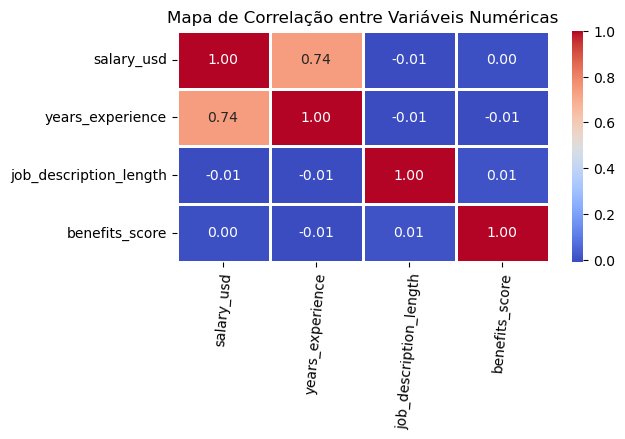

In [19]:
# Seleciona apenas colunas numéricas do Global
df_numericas = df_unificado[df_unificado['company_location'] != 'Brasil'].select_dtypes(include=['int64', 'float64', 'bool'])
#df_numericas = df_unificado.select_dtypes(include=['int64', 'float64'])


# Calcula a matriz de correlação
matriz_corr = df_numericas.corr()

# Define o tamanho da figura
plt.figure(figsize=(6, 3))

# Cria o heatmap com anotações
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)

# Título
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.xticks(rotation=85)
plt.yticks(rotation=0)
plt.show()

Resumo:
- Percebemos uma forte correlação entre `salary_usd` e `years_experience`, algo que já cogitávamos antes.
- Entretanto, os `benefits_score` não tem forte correlação com `salary_usd` e `years_experience`. Não necessariamente melhores salários ou anos de experiência trarão melhores benefícios no Global. 

### 🔹 Aplicação do Onehot Encoding

Para complementar a análise, era necessário incluir também as variáveis categóricas na matriz de correlação. Para isso, aplicamos o One-Hot Encoding nos campos categóricos, transformando-os em variáveis numéricas.

In [20]:
# Aplica One-Hot Encoding direto no df_unificado
df_encoded = pd.get_dummies(
    df_unificado, 
    columns=['experience_level', 'employment_type', 'company_size', 'remote_ratio'],
    drop_first=False
)

### 🔹 Mapa de Calor (Heatmap) com dados Categóricos transformados | Somente Global 🌍


com as variáveis categóricas no novo Heatmap, agora podemos visualizar mais correlações, possíveis padrões e mais insights.

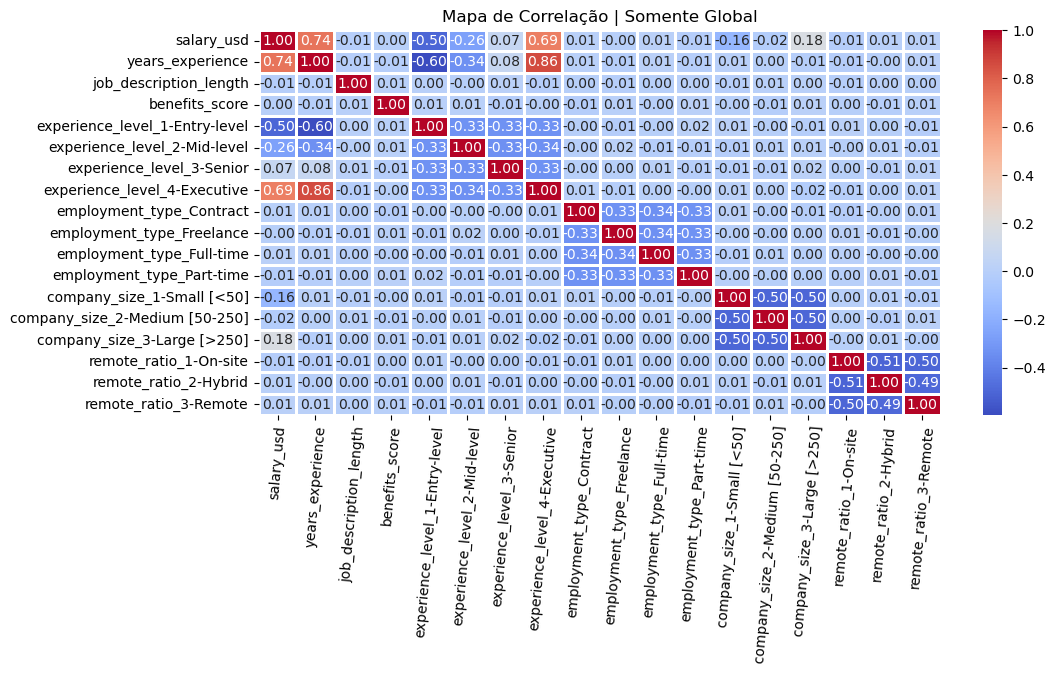

In [21]:
# Exclui os dados do Brasil
df_encoded_global = df_encoded[df_encoded['company_location'] != 'Brasil']

# Seleciona apenas colunas numéricas do Global
df_numericas = df_encoded_global.select_dtypes(include=['int64', 'float64', 'bool'])

# Calcula a matriz de correlação
matriz_corr = df_numericas.corr()

# Define o tamanho da figura
plt.figure(figsize=(11, 5))

# Cria o heatmap com anotações
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)

# Título
plt.title('Mapa de Correlação | Somente Global')
plt.xticks(rotation=85)
plt.yticks(rotation=0)
plt.show()

Resumo:
- Com uma visão mais abrangente dos dados, de cara percebemos uma forte correlação do campo `experience_level_4-Executive` com `salary_usd` ***(0.69)*** e `years_experience` ***(0.86)***. Portanto já esperávamos isso, cargos Executivos possuem os maiores salários e esperam mais anos de experiência.
- Portanto, para o `experience_level_3-Senior` a correlação não é tão forte, isso porque apesar de mais experiente que **Junior** e **Mid-level**, geralmente não tem salários ou anos de experiência tão distantes do restante do dataset.
- Já nos campos `experience_level_1-Entry-level` e `experience_level_2-Mid-level` percebemos uma correlação negativa forte, onde a categoria está muito presente nos menores salários e anos de experiência.
- Embora a correlação não seja tão forte como no `experience_level`, ainda assim percebemos também uma correlação positiva em `company_size_3-Large [>250]` com `salary_usd` e correlação negativa com `company_size_1-Small [<50]`. Então no Global, grandes empresas tendem a pagar melhores salários, mas não é regra por conta da força da correlação.

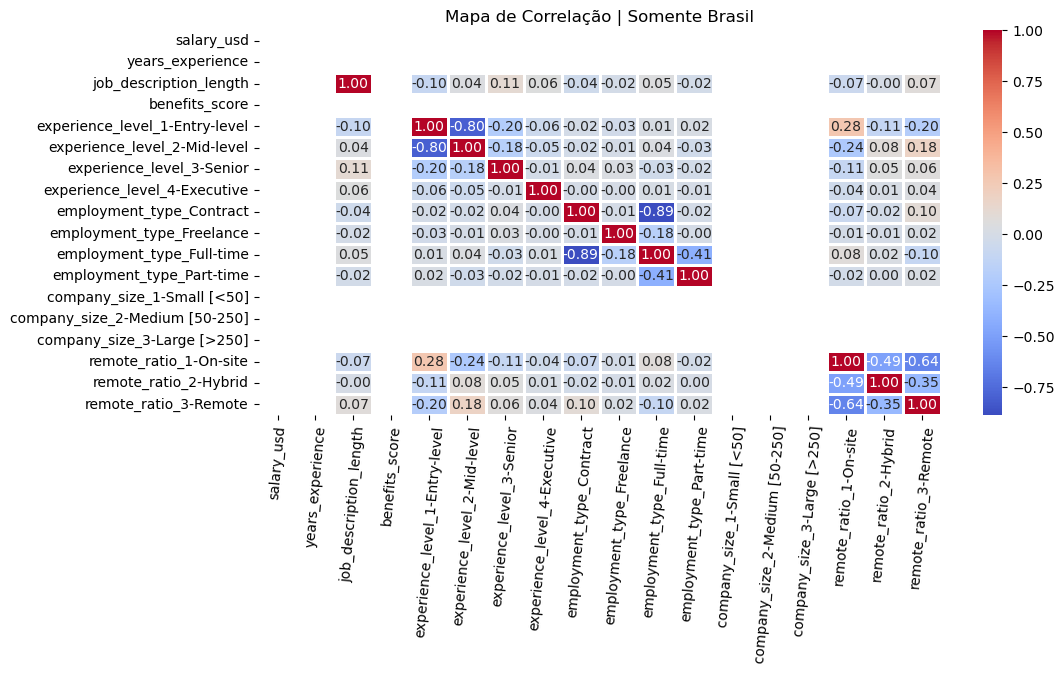

In [22]:
# Inclui os dados do Brasil
df_encoded_brasil = df_encoded[df_encoded['company_location'] == 'Brasil']

# Seleciona apenas colunas numéricas do Global
df_numericas = df_encoded_brasil.select_dtypes(include=['int64', 'float64', 'bool'])

# Calcula a matriz de correlação
matriz_corr = df_numericas.corr()

# Define o tamanho da figura
plt.figure(figsize=(11, 5))

# Cria o heatmap com anotações
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)

# Título
plt.title('Mapa de Correlação | Somente Brasil')
plt.xticks(rotation=85)
plt.yticks(rotation=0)
plt.show()

Resumo:
- Mesmo sem tantos dados como o Global, ainda assim no Brasil conseguimos visualizar alguns pontos importantes como forte correlação positiva de `experience_level_1-Entry-level` com `remote_ratio_1-On-site`. No Brasil, nota-se a importância que as empresas dão aos iniciantes de trabalharem presencialmente.

- Portanto há outro detalhe bastante curioso. Quando se pula um nível (`Mid-level`) essa correlação se inverte, e há uma demanda maior para vagas remotas e hibridas do que presenciais

| experience_level                  | `remote_ratio_1-On-site` | `remote_ratio_2-Hybrid` | `remote_ratio_3-Remote` |
|-----------------------------------|--------------------------|-------------------------|-------------------------|
| `experience_level_1-Entry-level`  | +0.28                    |          -0.11          |         -0.20           |
| `experience_level_2-Mid-level`    | -0.24                    |          +0.08          |         +0.18           |

- E então para os níveis mais altos `Senior` e `Executive` isso se estabiliza. Pode-se dizer que para níveis mais altos, muitas empresas no Brasil fazem questão dos cargos de confiança estarem presencial

### 🔹 Gráfico de Dispersão (scatterplot) | Somente Global 🌍
Já que identificamos a correlação entre `salary_usd` e `years_experience`, vamos usar o gráfico de dispersão (ou scatterplot), para entender melhor essa distribuição

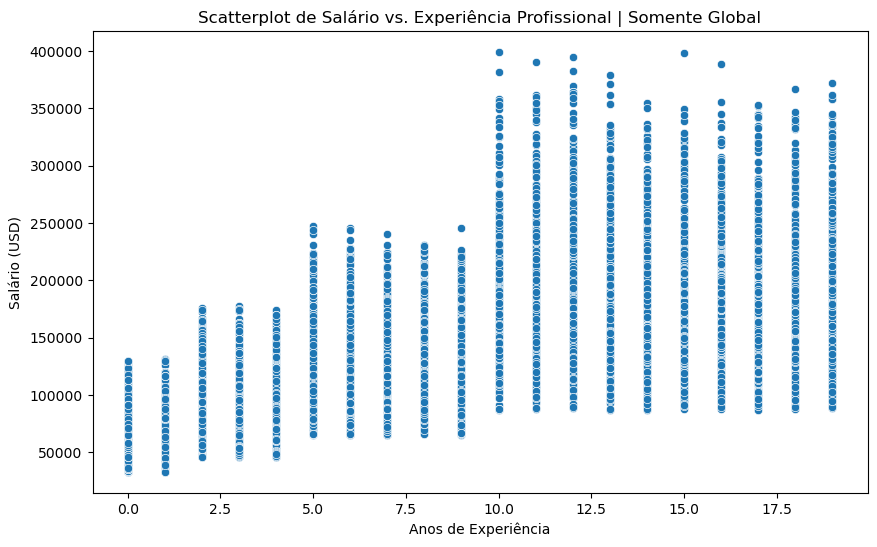

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_global, x='years_experience', y='salary_usd')
plt.title('Scatterplot de Salário vs. Experiência Profissional | Somente Global')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário (USD)')
plt.show()

Resumo:
- Antes dos 10 anos de experiência, a maioria dos salários fica abaixo de 250K dólares anuais, mostrando um teto para profissionais em início de carreira no Global.

- A partir dos 10 anos, os salários passam a se dispersar mais, com muitos ultrapassando 300K e alguns chegando a 400K dólares (outliers).

- Essa maior variação salarial depois dos 10 anos sugere que fatores como área de atuação e posição hierárquica passam a ter maior influência na remuneração, aumentando as diferenças entre profissionais com experiência semelhante.

### 🔹 Gráfico de Caixa (boxplot) | Somente Global 🌍
Vamos analisar a Distribuição Salarial dentro dos Níveis de experiência com o Boxplot agora

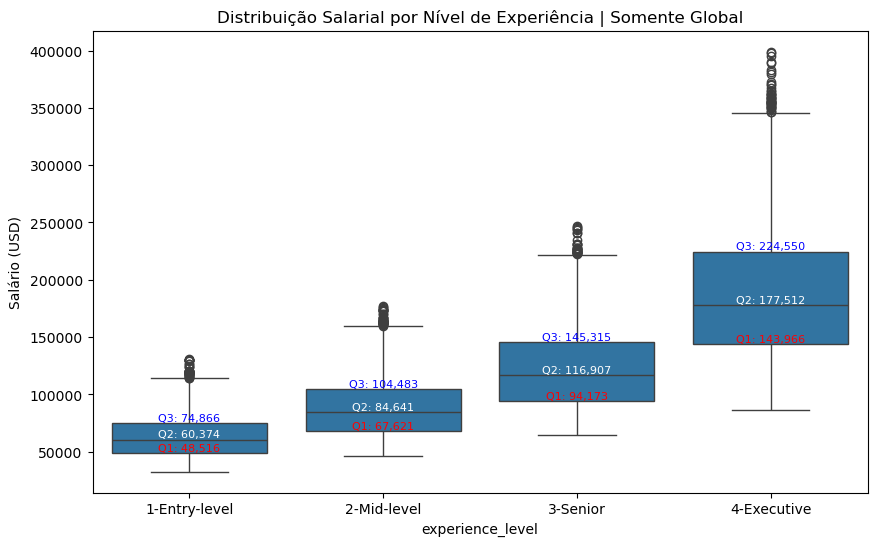

In [24]:
df_boxplot = df_unificado[df_unificado['company_location'] != 'Brasil']

# Gráfico
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_boxplot, x='experience_level', y='salary_usd')

# Quartis por categoria
quartis = df_boxplot.groupby('experience_level')['salary_usd'].quantile([0.25, 0.5, 0.75]).unstack()

# Adiciona as anotações no gráfico
for i, (cat, row) in enumerate(quartis.iterrows()):
    ax.text(i, row[0.25], f"Q1: {row[0.25]:,.0f}", color='red', ha='center', va='bottom', fontsize=8)
    ax.text(i, row[0.5], f"Q2: {row[0.5]:,.0f}", color='white', ha='center', va='bottom', fontsize=8)
    ax.text(i, row[0.75], f"Q3: {row[0.75]:,.0f}", color='blue', ha='center', va='bottom', fontsize=8)

plt.title("Distribuição Salarial por Nível de Experiência | Somente Global")
plt.ylabel("Salário (USD)")
plt.show()

Resumo:
- Nos níveis iniciais de experiência (`Entry-level`), os ***salários são mais concentrados em uma faixa estreita, geralmente entre 50.000 e 75.000 USD anuais***, com poucos casos acima de 100.000 USD considerados outliers.

- À medida que a experiência aumenta (`Mid-level` e `Senior`), a ***faixa salarial se torna mais ampla, mostrando maior variabilidade*** e indicando que fatores individuais começam a influenciar mais os salários.

- A distribuição salarial apresenta leve assimetria positiva: a mediana tende a ficar mais próxima do limite inferior da faixa, enquanto os salários mais altos são mais dispersos e geram outliers.

- No nível `Executive`, a ***variabilidade salarial é a maior de todas, com a maioria dos salários entre 145.000 e 225.000 USD***, mas com muitos casos ultrapassando essa faixa e chegando perto de 400.000 USD, evidenciando ***grande disparidade em cargos de liderança***.

### 🔹 Gráficos de Barras visão Geral | Somente Global 🌍

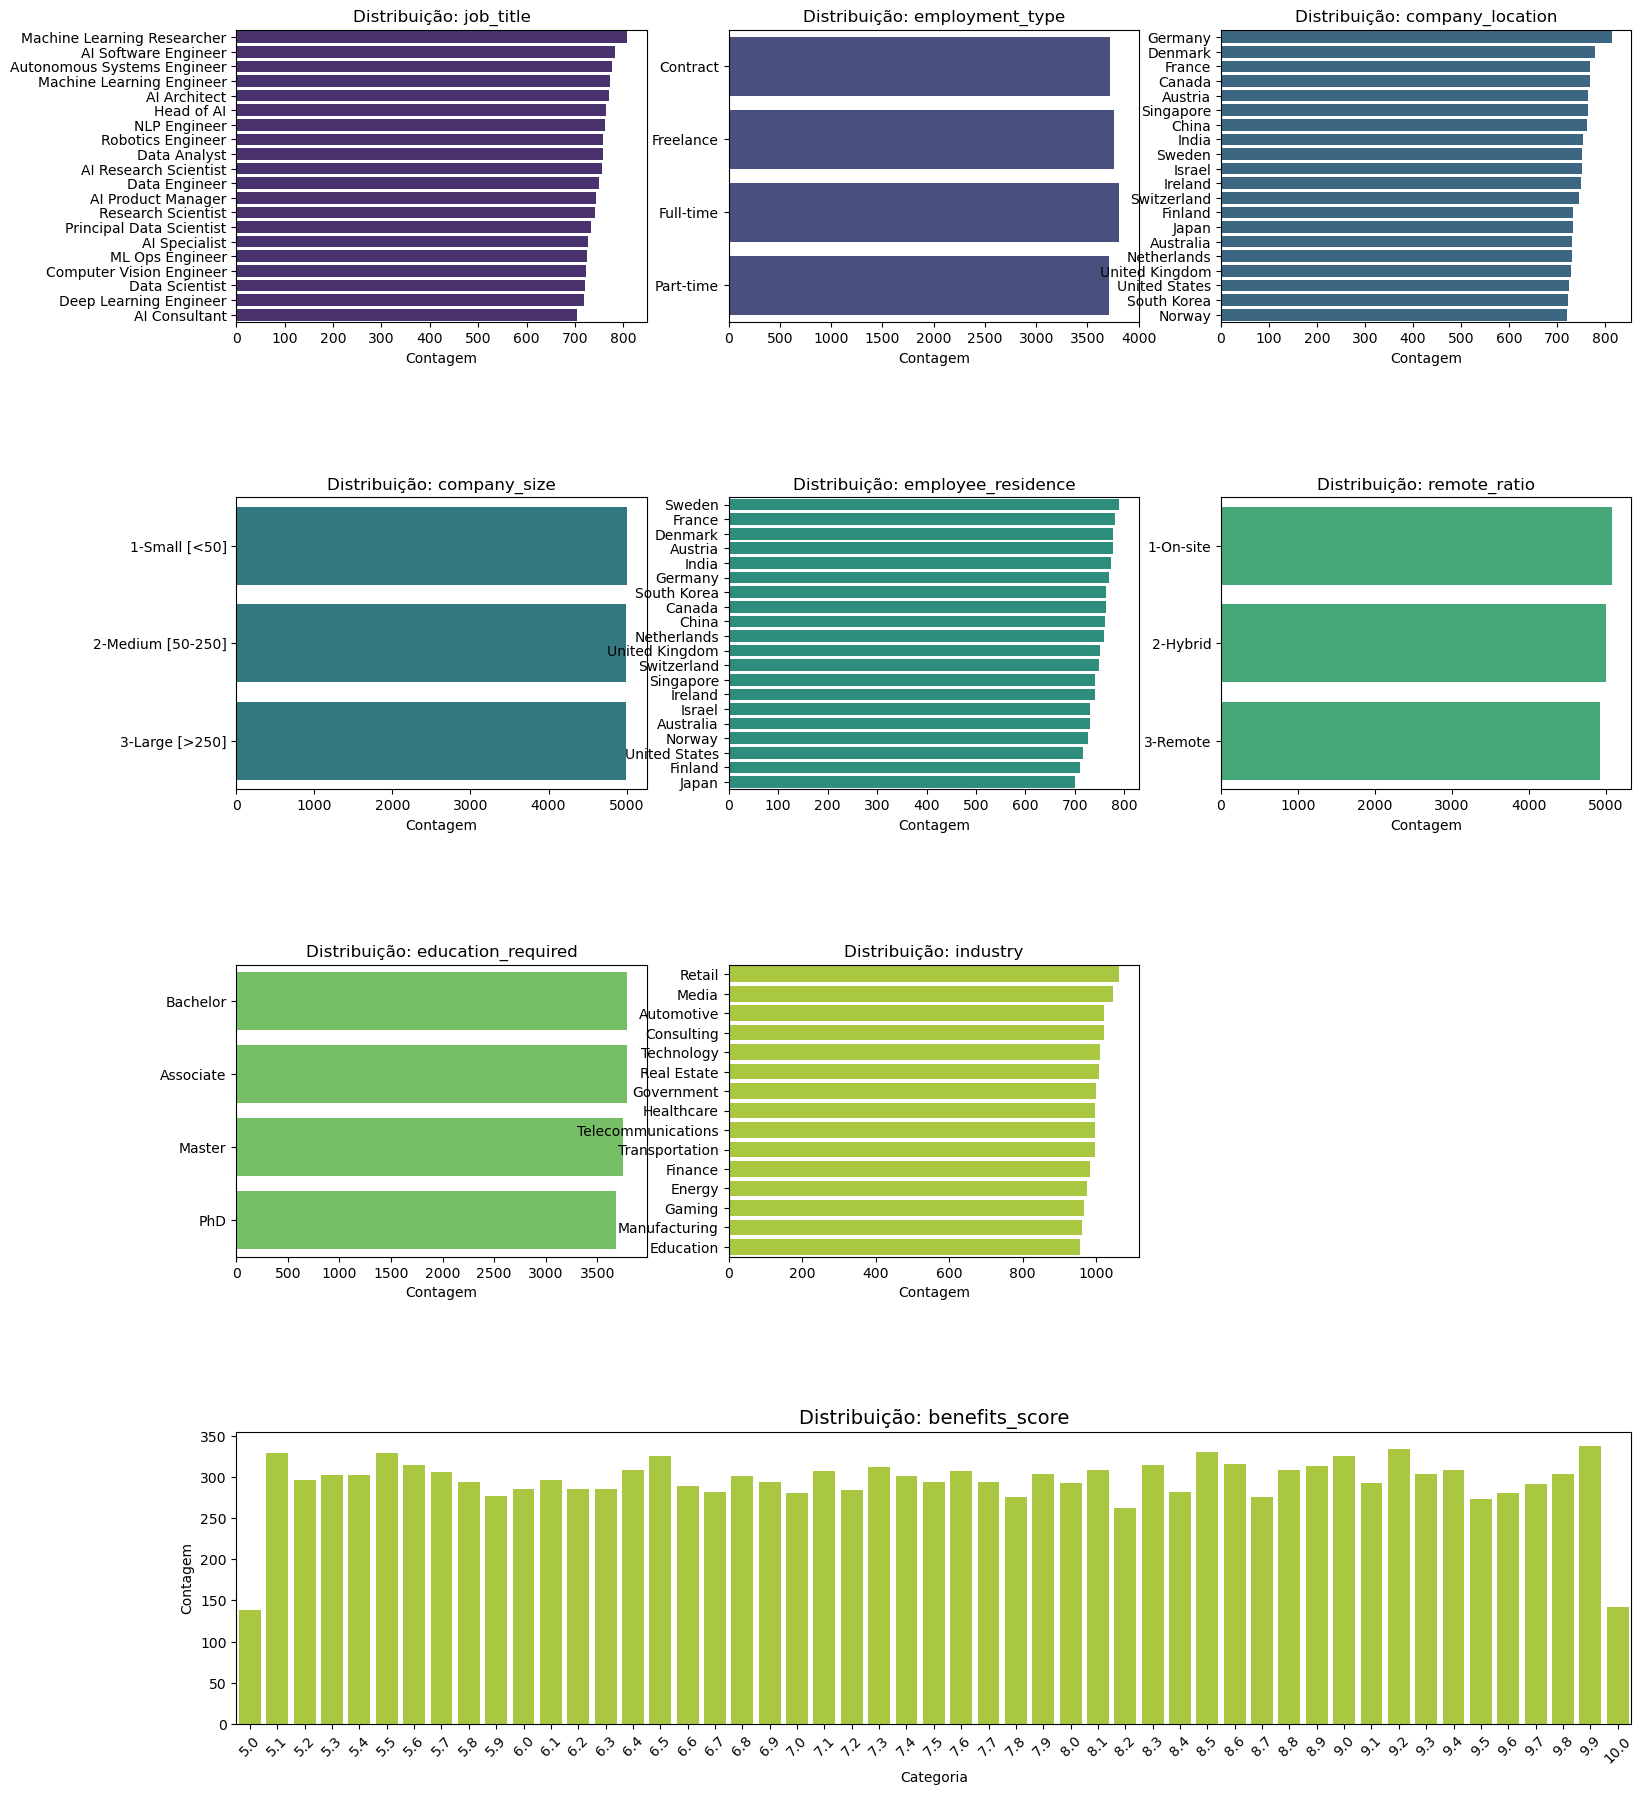

In [25]:
# Exclui os dados do Brasil
df_bar = df_unificado[df_unificado['company_location'] != 'Brasil']


# Lista de colunas categóricas (benefits_score será tratado separado)
categorias = ['job_title', 'employment_type', 'company_location',
              'company_size', 'employee_residence',
              'remote_ratio', 'education_required', 'industry']

viridis = color_palette("viridis", len(categorias))

# Configura a grade: 4 linhas (a última será só para benefits_score), 3 colunas
fig = plt.figure(figsize=(18, 22))
gs = gridspec.GridSpec(4, 3, figure=fig)
gs.update(hspace=0.6)  # Espaçamento vertical

# Loop para os primeiros 8 gráficos (3x3 menos o último espaço)
for i, coluna in enumerate(categorias):
    ax = fig.add_subplot(gs[i // 3, i % 3])
    contagem = df_bar[coluna].value_counts()
    sns.barplot(x=contagem.values, y=contagem.index, color=viridis[i], ax=ax)
    ax.set_title(f'Distribuição: {coluna}', fontsize=12)
    ax.set_xlabel('Contagem')
    ax.set_ylabel('')

# Gráfico do benefits_score ocupando a linha inteira (linha 3, colunas 0 até 2)
ax_big = fig.add_subplot(gs[3, :])  # Usa a linha inteira
contagem_benefits = df_bar['benefits_score'].value_counts()
sns.barplot(x=contagem_benefits.index, y=contagem_benefits.values, color=viridis[i], ax=ax_big)
ax_big.set_title('Distribuição: benefits_score', fontsize=14)
ax_big.set_xlabel('Categoria')
ax_big.set_ylabel('Contagem')
ax_big.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Resumo
- Após a visualização consolidada de todos os gráficos de barras, a primeira impressão é de que os dados estão bem distribuídos entre as categorias.
- Observamos uma boa variação entre os valores, sem a presença de categorias que dominam esmagadoramente os registros (ex: nenhuma com mais de 90% de ocorrência).

- Isso nos dá segurança para análises comparativas futuras, já que as categorias têm representatividade suficiente e não sofrem com viés por baixa amostragem.

- A única exceção foi a variável `benefits_score`, que apresentou um leve padrão de concentração nas pontas:

    - Algumas empresas atribuíram nota mínima (5.0), enquanto outras marcaram nota máxima (10.0).

    - Mesmo assim, a distribuição geral dos scores está relativamente próxima e equilibrada, sem grandes distorções.

### 🔹 Gráficos de Barras visão Geral | Somente Brasil

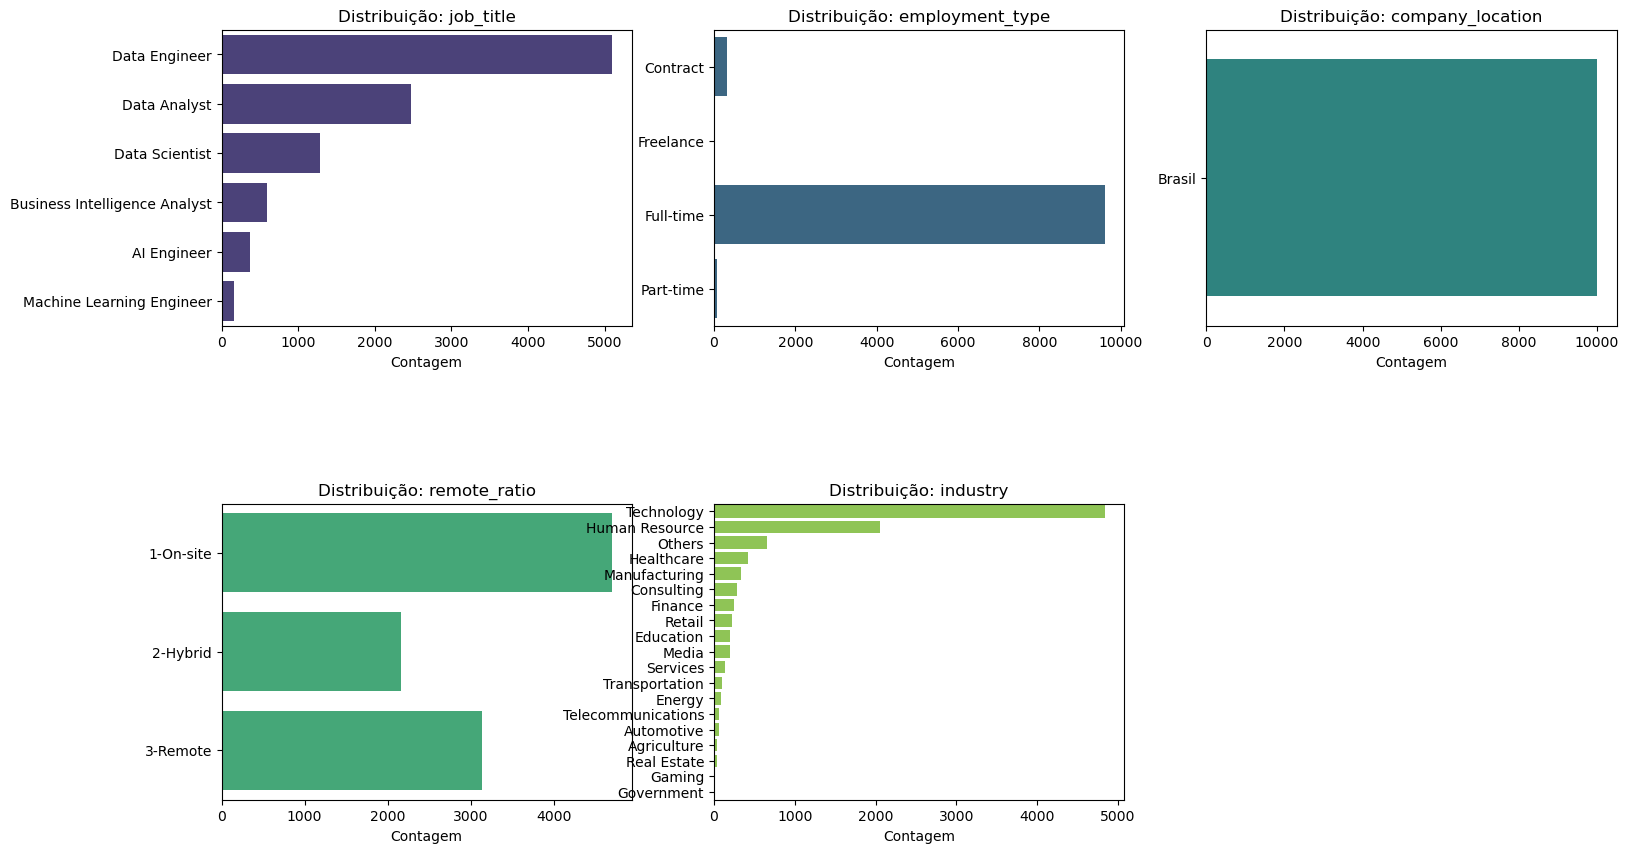

In [26]:
df_bar = df_unificado.loc[df_unificado['company_location'] == 'Brasil']


# Lista de colunas categóricas (benefits_score será tratado separado)
categorias = ['job_title', 'employment_type', 'company_location',
              'remote_ratio', 'industry']

viridis = color_palette("viridis", len(categorias))

# Configura a grade: 4 linhas (a última será só para benefits_score), 3 colunas
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2, 3, figure=fig)
gs.update(hspace=0.6)  # Espaçamento vertical

# Loop para os primeiros 8 gráficos (3x3 menos o último espaço)
for i, coluna in enumerate(categorias):
    ax = fig.add_subplot(gs[i // 3, i % 3])
    contagem = df_bar[coluna].value_counts()
    sns.barplot(x=contagem.values, y=contagem.index, color=viridis[i], ax=ax)
    ax.set_title(f'Distribuição: {coluna}', fontsize=12)
    ax.set_xlabel('Contagem')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

Resumo:

- Na contramão do Global, há uma demanda muito grande de Engenheiro de Dados no Brasil.

- A modalidade de Trabalho de Período Integral (Full-Time) permance dominando o mercado brasileiro, mesmo para a área de Dados e IA.

- O que surpreende (no meu ponto de vista de forma negativa), é que a demanda de trabalhos presenciais (On-Site) ainda dominam o mercado, mais que a híbrida e 100% remota.

- Mas como vimos anteriormente, essa demanda de trabalho presenciais e sua maioria são para os primeiros níveis (Estágios e Juniors), o que se torna justificável.

### 🔹 Gráfico de Caixa (boxplot) | Benefits Score | Somente Global 🌍
Aqui usamos o Boxplot para visualizar a distribuição do `benefits_score` em todas as empresas do Global, para análisar se há um país que oferece melhores benefícios que outros

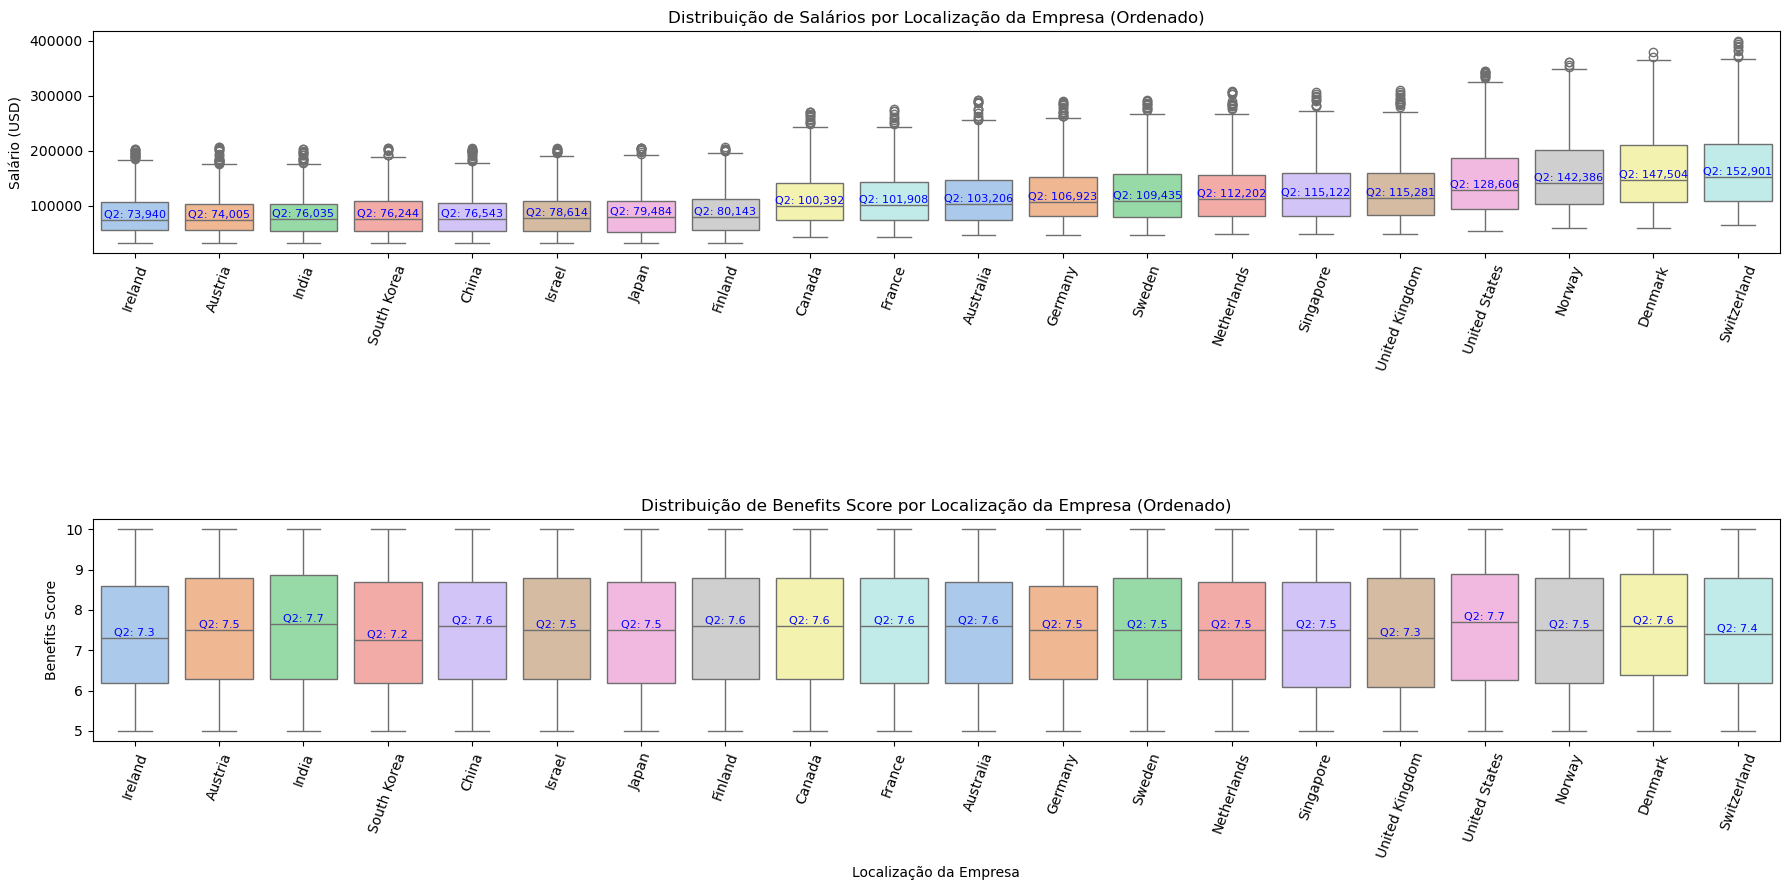

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define a ordem baseada na mediana de salary_usd
ordem = df_global.groupby('company_location')['salary_usd'].median().sort_values().index

# Cria subplots: 2 linhas x 1 coluna
fig, axes = plt.subplots(2, 1, figsize=(18, 9))

#=========================================================================================
# Gráfico 1: Salários
#=========================================================================================
sns.boxplot(
    x='company_location',
    y='salary_usd',
    data=df_global,
    palette='pastel',
    order=ordem,
    ax=axes[0]
)

# Calcula apenas a mediana (Q2) por company_location (mais eficiente!)
medianas = df_global.groupby('company_location')['salary_usd'].median()

# Adiciona apenas as anotações do Q2 no gráfico
for i, cat in enumerate(ordem):
    if cat in medianas.index:
        axes[0].text(
            i,
            medianas[cat],
            f"Q2: {medianas[cat]:,.0f}",
            color='blue',
            ha='center',
            va='bottom',
            fontsize=8
        )

axes[0].set_title('Distribuição de Salários por Localização da Empresa (Ordenado)')
axes[0].set_xlabel('')
axes[0].set_ylabel('Salário (USD)')
axes[0].tick_params(axis='x', rotation=70)

#=========================================================================================
# Gráfico 2: Benefits Score
#=========================================================================================
sns.boxplot(
    x='company_location',
    y='benefits_score',
    data=df_global,
    palette='pastel',
    order=ordem,  # usa a mesma ordem para comparação direta
    ax=axes[1]
)

# Calcula apenas a mediana (Q2) por company_location (mais eficiente!)
medianas = df_global.groupby('company_location')['benefits_score'].median()

# Adiciona apenas as anotações do Q2 no gráfico correto (axes[1])
for i, cat in enumerate(ordem):
    if cat in medianas.index:
        axes[1].text(
            i,
            medianas[cat],
            f"Q2: {medianas[cat]:,.1f}",  # benefits_score parece ser float; exibe 1 casa decimal
            color='blue',
            ha='center',
            va='bottom',
            fontsize=8
        )

axes[1].set_title('Distribuição de Benefits Score por Localização da Empresa (Ordenado)')
axes[1].set_xlabel('Localização da Empresa')
axes[1].set_ylabel('Benefits Score')
axes[1].tick_params(axis='x', rotation=70)


plt.tight_layout()
plt.subplots_adjust(hspace=1.2)  # aumenta o espaçamento vertical entre os gráficos
plt.show()

Resumo:
- Vemos nítidamente países como Suiça(`Switzerland`), Dinamarca(`Denmark`) e Noruega(`Norway`) com medianas salariais muito acima das outras, destacando-se por sua alta remuneração
- Na contramão, vemos Irlanda(`Ireland`) Austria e India comas menores medianas.
- Países que estão acima dos 125K USDs anuais apresentam bigodes mais altos, indicando maior variabilidade salarial, tornando mais dificil prever quanto ganhar nesses países.
- Já países abaixo dos 100k, têm salarios mais concentrados na Mediana. 

---

## 🔶Tratamento final dos Dados
Nesse momento já temos noção de quais dados explorar no dataset. 

Faremos um último tratamento nos dados e então partir para análise final.

### 🔸 Definição das Colunas do Dataset
Faremos a exclusão de algumas colunas desse dataset, para mantê-lo mais limpo.
Quais colunas serão excluídas:
- `job_id` → Coluna apenas de id, não há necessidade de mantê-la
- `salary_currency` → A coluna `salary_usd` já nos informa o salário convertido em Dolar anuais
- `application_deadline` → Esse prazo não traz nenhuma informação relevante.
- `job_description_length` → Essa coluna também não traz nenhuma informação que precisaremos
- `company_name` → Não precisaremos dos nomes para as análises tambem

Utilizando a classe `LimpezaFinalDados`, faremos o tratamento final dos dados

In [28]:
colunas_remover = ['job_id', 'salary_currency', 'application_deadline', 'job_description_length', 'company_name']

df_unificado = LimpezaFinalDados(df_unificado, colunas_remover=colunas_remover).executar()

📥 Iniciando limpeza final...
🔹 Colunas removidas: job_id, salary_currency, application_deadline, job_description_length, company_name
✅ Fim da limpeza final. DataFrame disponível.


### 🔸 Exibindo os 5 primeiros registros, para confirmar a remoção das colunas

In [29]:
df_unificado.head(5)

,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,benefits_score,Start_Month
0,AI Research Scientist,90376,3-Senior,Contract,China,2-Medium [50-250],China,2-Hybrid,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,5.9,2024-10
1,AI Software Engineer,61895,1-Entry-level,Contract,Canada,2-Medium [50-250],Ireland,3-Remote,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,5.2,2024-11
2,AI Specialist,152626,2-Mid-level,Freelance,Switzerland,3-Large [>250],South Korea,1-On-site,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,9.4,2025-03
3,NLP Engineer,80215,3-Senior,Freelance,India,2-Medium [50-250],India,2-Hybrid,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,8.6,2024-12
4,AI Consultant,54624,1-Entry-level,Part-time,France,1-Small [<50],Singapore,3-Remote,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,6.6,2025-04


### 🔸 Criação do Dataframe para required_skills e plotagem de gráfico

Inicialmente, havíamos comentado sobre a dificuldade de extrair insights do campo `required_skills` devido a estrutura dos dados. (cada habilidade separada por  `,`).

A saída encontrada foi construir um Dataframe unificando esses dados.

A melhor maneira (e mais organizada) foi criar uma Classe (`GeradorSkillsPorCategoria`) dentro da `TratamentoDeDados.py` e criar uma função que faria esse tratamento.

O `GeradorSkillsPorCategoria` recebe 2 atributos:
- `df` → Dataframe do nosso estudo
- `coluna_categoria` → uma coluna que servirá de estudo, que retornará quantas habilidades por aquela coluna escolhida

Essa função permite visualizarmos qualquer coluna do Dataframe, apenas trocando o nome da coluna

In [30]:
df_skills_job_title = GeradorSkillsPorCategoria(df_unificado, 'job_title')
df_skills_job_title.gerar()
df_skills_job_title.plotar_top_habilidades_interativo(top_n=5)

✅ DataFrame de skills por 'job_title' gerado com sucesso.


interactive(children=(Dropdown(description='job_title:', layout=Layout(width='50%'), options=('AI Architect', …

---

## 🎯 Insights obtidos do Dataset e Conclusões
Agora que exploramos bem o nosso Conjunto de Dados, vamos tentar obter insights valiosos e tirar as conclusões dos problemas inicialmente definidos

### 0️⃣1️⃣ Quais áreas de atuação estão em maior crescimento no Global?

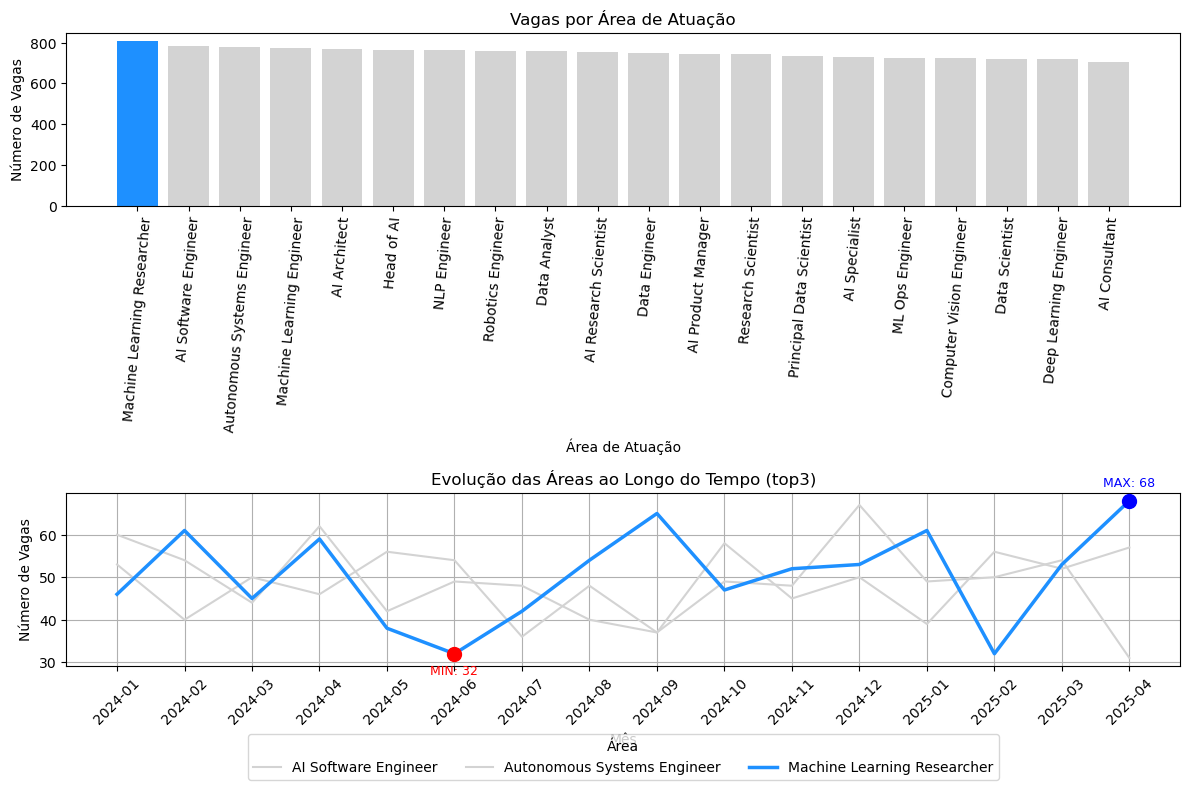

In [31]:
# Criar figura com 2 subplots em coluna

df_unificado_global = df_unificado.loc[df_unificado['company_location'] != 'Brasil']


fig, axs = plt.subplots(2, 1, figsize=(12, 9))

# ================================
# Gráfico 1: Barras totais com primeira barra azul
# ================================
df_agrupado = df_unificado_global['job_title'].value_counts()

# Cria a lista de cores: primeira barra azul, outras cinza
cores = ['dodgerblue'] + ['lightgray'] * (len(df_agrupado) - 1)

# Plota o gráfico com cores personalizadas
axs[0].bar(df_agrupado.index, df_agrupado.values, color=cores)
axs[0].set_title('Vagas por Área de Atuação')
axs[0].set_xlabel('Área de Atuação')
axs[0].set_ylabel('Número de Vagas')
axs[0].tick_params(axis='x', rotation=85)


# ================================
# Gráfico 2: Linhas no tempo
# ================================
top_5_areas = df_unificado_global['job_title'].value_counts().nlargest(3).index
df_top = df_unificado_global[df_unificado_global['job_title'].isin(top_5_areas)]

df_linhas = (
    df_top
    .groupby(['Start_Month', 'job_title'])
    .size()
    .unstack(fill_value=0)
)

total_por_area = df_linhas.sum()
area_destaque = total_por_area.idxmax()

# Pegando a série da linha azul
serie_destaque = df_linhas[area_destaque]
x = df_linhas.index

# Encontrando pico e vale
pico_idx = serie_destaque.idxmax()
vale_idx = serie_destaque.idxmin()
pico_val = serie_destaque.max()
vale_val = serie_destaque.min()

# Plotando as linhas
for area in df_linhas.columns:
    if area == area_destaque:
        axs[1].plot(x, serie_destaque, label=area, color='dodgerblue', linewidth=2.5)
    else:
        axs[1].plot(x, df_linhas[area], label=area, color='lightgray', linewidth=1.5)

# Destaques no gráfico
axs[1].scatter(pico_idx, pico_val, color='blue', s=100, zorder=5)
axs[1].annotate(f'MAX: {pico_val}', (pico_idx, pico_val),
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='blue')

axs[1].scatter(vale_idx, vale_val, color='red', s=100, zorder=5)
axs[1].annotate(f'MIN: {vale_val}', (vale_idx, vale_val),
                textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='red')

axs[1].set_title('Evolução das Áreas ao Longo do Tempo (top3)')
axs[1].set_xlabel('Mês')
axs[1].set_ylabel('Número de Vagas')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(True)
axs[1].legend(title='Área', loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=3)

# Layout final
plt.tight_layout()
plt.show()

# df_skills_job_title = GeradorSkillsPorCategoria(df_unificado_global, 'job_title')
# df_skills_job_title.gerar()
# df_skills_job_title.plotar_top_habilidades_interativo(top_n=5, categoria_especifica="Data Engineer")


### 0️⃣1️⃣🆗 **Conclusão | Global**
As ***As 3 áreas com maior crescimento desde Janeiro de 2024 no Global*** foram:
1. Machine Learning Researcher
2. IA Software Engineer
3. Autonomous Systems Engineer

Surpreendentemente as áreas de de ***Data Analyst, Data Engineer e Data Scientist não apresentaram grande crescimento como esperado***, dando espaço a muitas áreas relacionadas a IA (IA Software Engineer, IA Architect, Head of IA, etc...)

Olhando para a evolução ao longo do tempo, a área de ***Machine Learning Resercher apresentou sua menor queda em número de vagas em Junho/2024, com 32 vagas no mês***, mas que logo voltou a crescer contínuamente.

Recentemente, ***em Abril/2025 apresentou seu maior pico em número de vagas, com um total de 68 vagas no mês***.

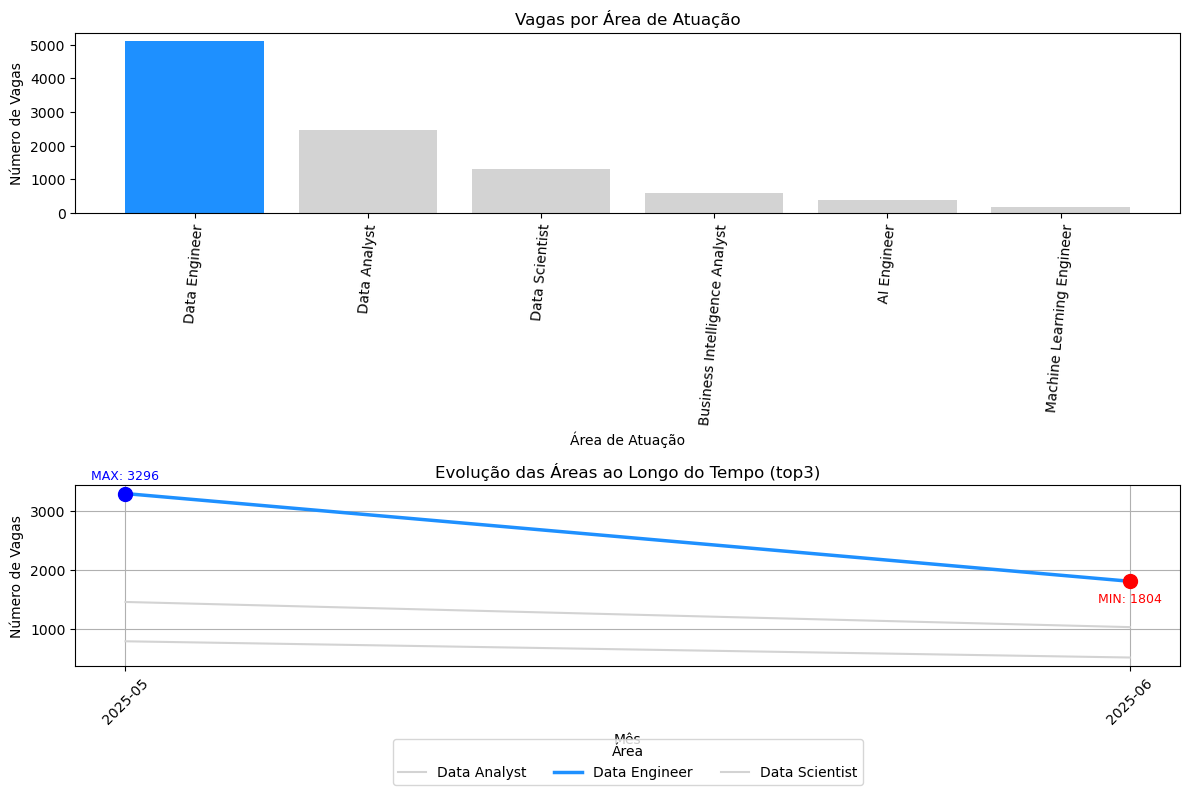

In [32]:
# Criar figura com 2 subplots em coluna

df_unificado_global = df_unificado.loc[df_unificado['company_location'] == 'Brasil']


fig, axs = plt.subplots(2, 1, figsize=(12, 9))

# ================================
# Gráfico 1: Barras totais com primeira barra azul
# ================================
df_agrupado = df_unificado_global['job_title'].value_counts()

# Cria a lista de cores: primeira barra azul, outras cinza
cores = ['dodgerblue'] + ['lightgray'] * (len(df_agrupado) - 1)

# Plota o gráfico com cores personalizadas
axs[0].bar(df_agrupado.index, df_agrupado.values, color=cores)
axs[0].set_title('Vagas por Área de Atuação')
axs[0].set_xlabel('Área de Atuação')
axs[0].set_ylabel('Número de Vagas')
axs[0].tick_params(axis='x', rotation=85)


# ================================
# Gráfico 2: Linhas no tempo
# ================================
top_5_areas = df_unificado_global['job_title'].value_counts().nlargest(3).index
df_top = df_unificado_global[df_unificado_global['job_title'].isin(top_5_areas)]

df_linhas = (
    df_top
    .groupby(['Start_Month', 'job_title'])
    .size()
    .unstack(fill_value=0)
)

total_por_area = df_linhas.sum()
area_destaque = total_por_area.idxmax()

# Pegando a série da linha azul
serie_destaque = df_linhas[area_destaque]
x = df_linhas.index

# Encontrando pico e vale
pico_idx = serie_destaque.idxmax()
vale_idx = serie_destaque.idxmin()
pico_val = serie_destaque.max()
vale_val = serie_destaque.min()

# Plotando as linhas
for area in df_linhas.columns:
    if area == area_destaque:
        axs[1].plot(x, serie_destaque, label=area, color='dodgerblue', linewidth=2.5)
    else:
        axs[1].plot(x, df_linhas[area], label=area, color='lightgray', linewidth=1.5)

# Destaques no gráfico
axs[1].scatter(pico_idx, pico_val, color='blue', s=100, zorder=5)
axs[1].annotate(f'MAX: {pico_val}', (pico_idx, pico_val),
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='blue')

axs[1].scatter(vale_idx, vale_val, color='red', s=100, zorder=5)
axs[1].annotate(f'MIN: {vale_val}', (vale_idx, vale_val),
                textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='red')

axs[1].set_title('Evolução das Áreas ao Longo do Tempo (top3)')
axs[1].set_xlabel('Mês')
axs[1].set_ylabel('Número de Vagas')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(True)
axs[1].legend(title='Área', loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=3)

# Layout final
plt.tight_layout()
plt.show()

# df_skills_job_title = GeradorSkillsPorCategoria(df_unificado_global, 'job_title')
# df_skills_job_title.gerar()
# df_skills_job_title.plotar_top_habilidades_interativo(top_n=5, categoria_especifica="Data Engineer")


### 0️⃣1️⃣🆗 **Conclusão | Brasil**
A área que tem maior demanda no Brasil hoje é ***Data Engineer***, aparecendo com mais de ***5000 mil vagas disponíveis***.

Entretanto, os dados disponibilizados apresentam apenas de Maio/2025 à Junho/2026, um periodo muito pequeno para tirarmos qualquer conclusão

---

### 0️⃣2️⃣ Quais regiões estão contratando em maior escala? E como estão distribuídos os salários globalmente?

Pelo fato de não termos informações de salários do Brasil, excluiremos ele dessa análise

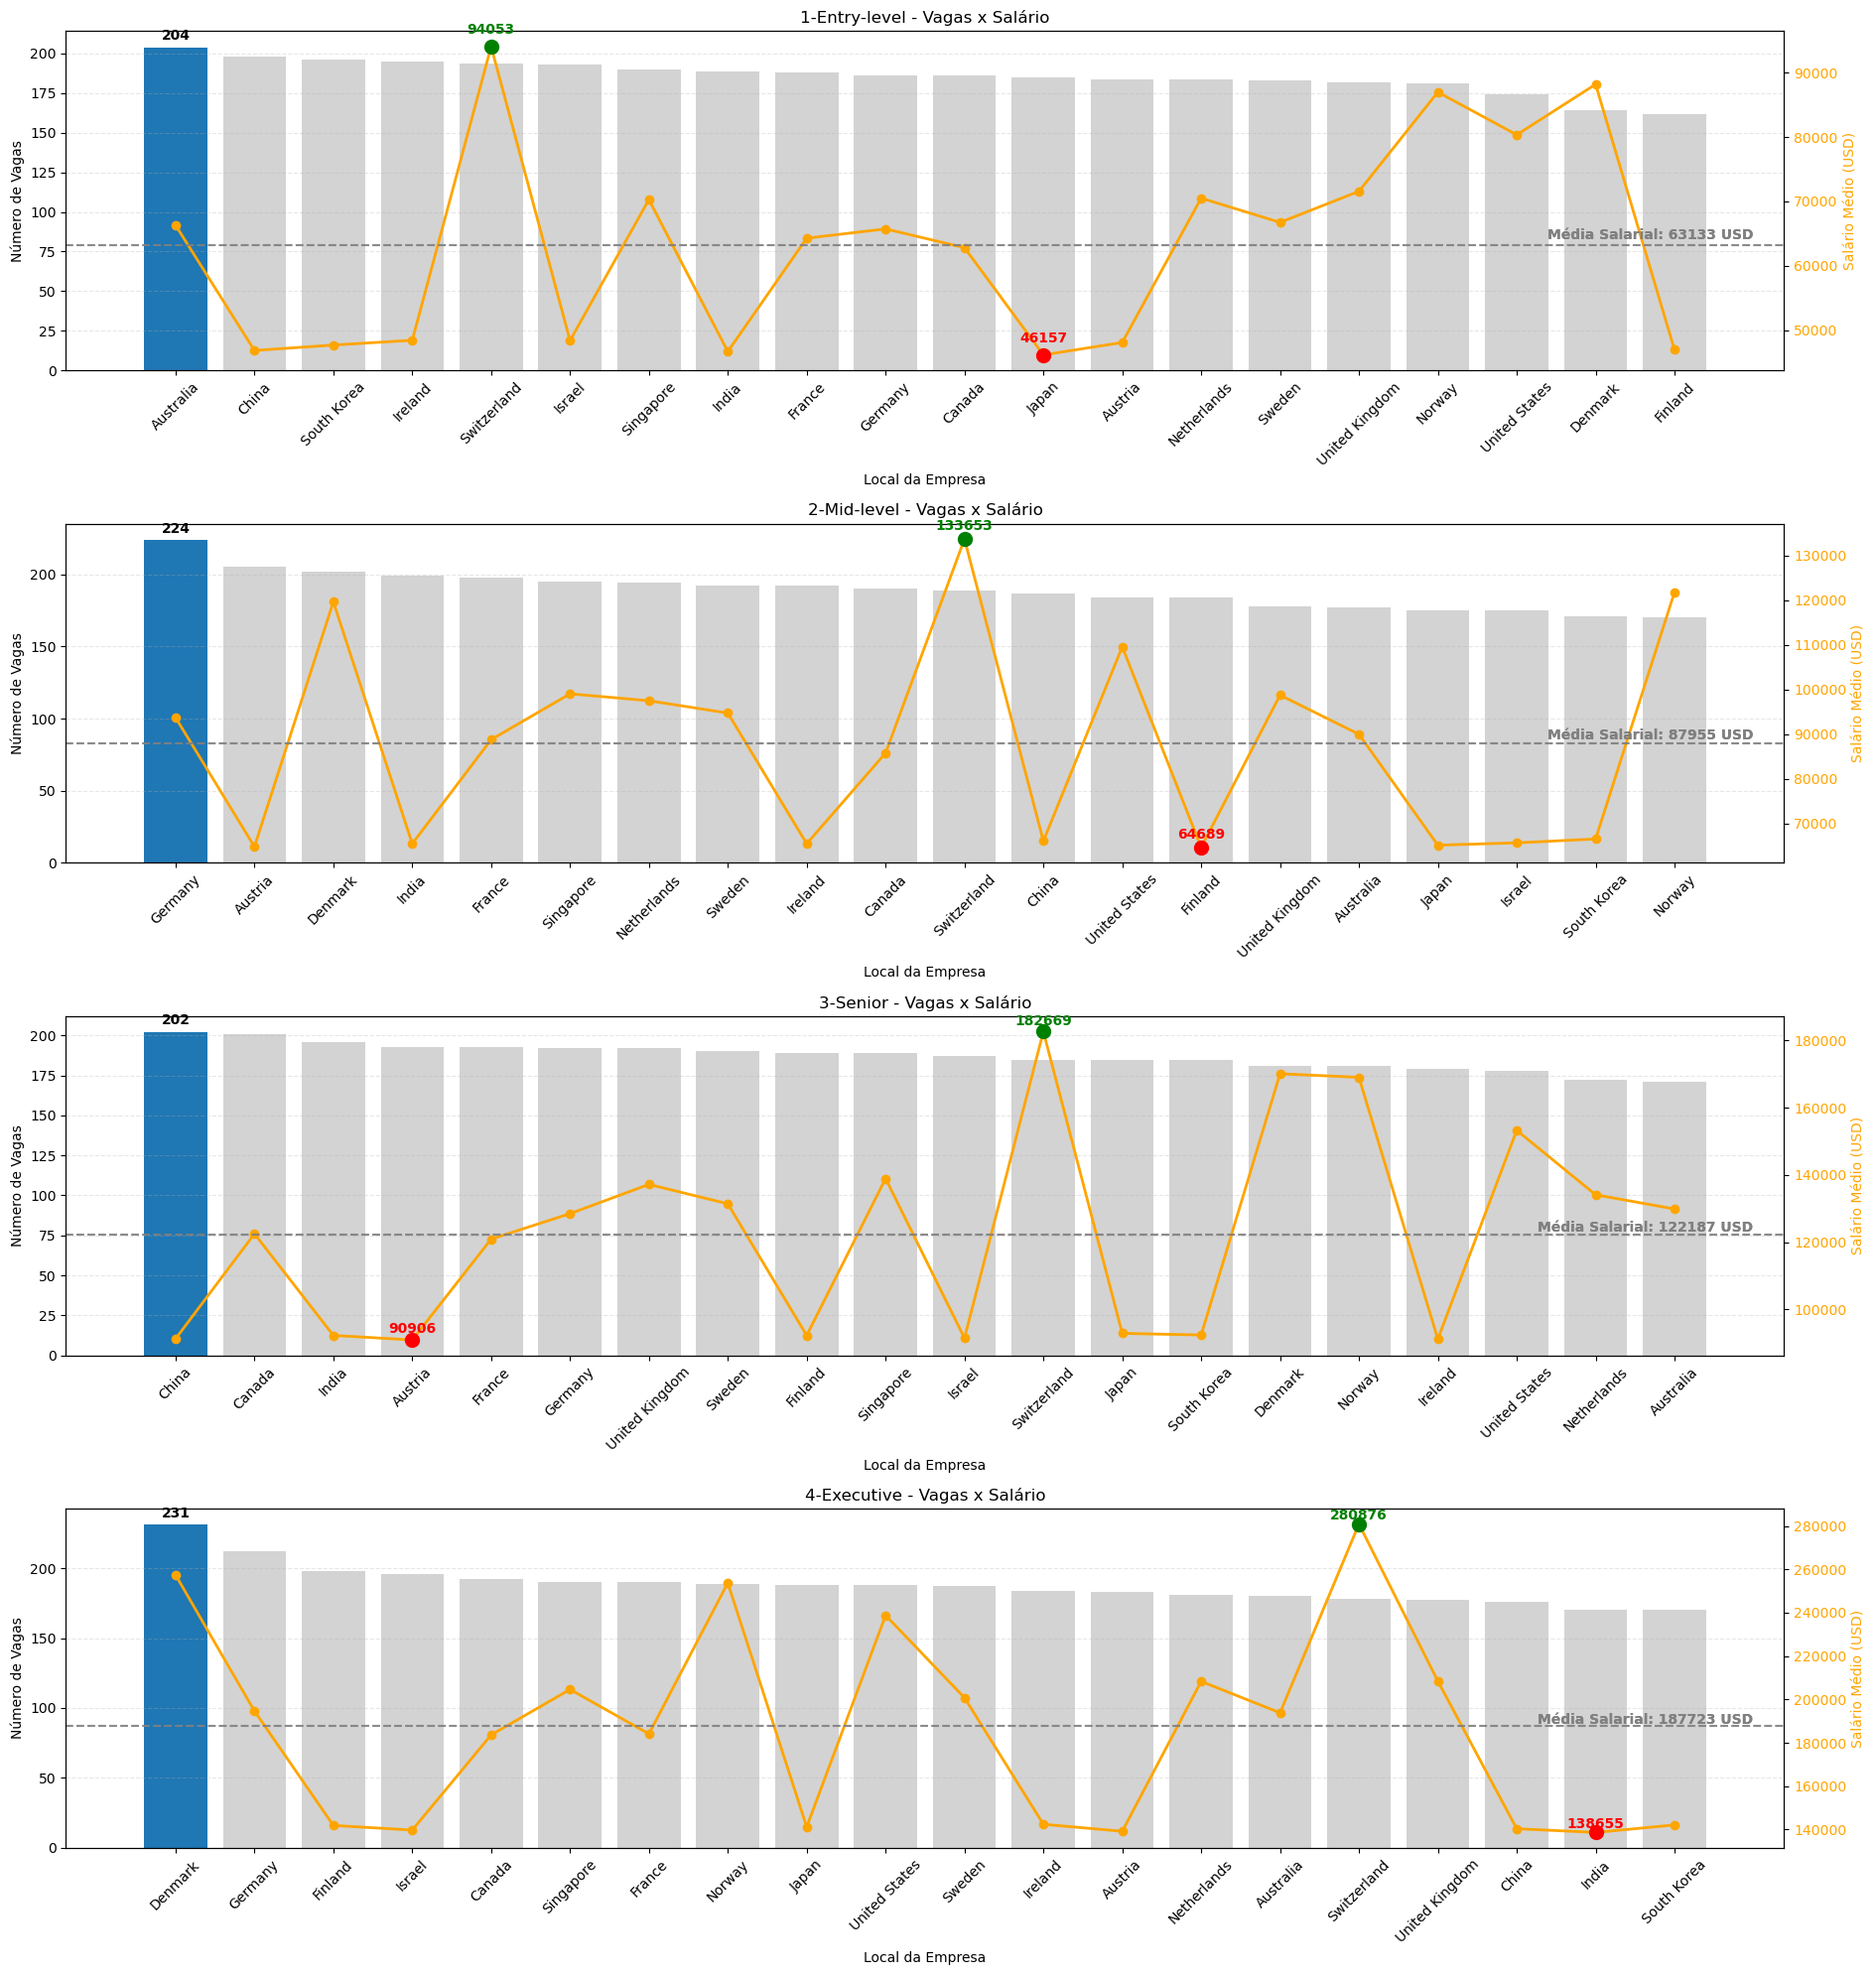

In [33]:
df_excluidos = df_unificado.loc[df_unificado['company_location'] != 'Brasil']

# paises_excluir = ['Switzerland', 'Denmark', 'Norway']
# df_excluidos = df[~df['company_location'].isin(paises_excluir)]

# 1. Agrupar dados de vagas e salários
df_vagas_exp = (
    df_excluidos.groupby(['company_location', 'experience_level'])
    .size()
    .reset_index(name='qtd_vagas')
)

df_media_salario = (
    df_excluidos.groupby(['company_location', 'experience_level'])['salary_usd']
    .mean()
    .reset_index()
)

df_vagas_salarios = pd.merge(
    df_vagas_exp,
    df_media_salario,
    on=['company_location', 'experience_level'],
    how='inner'
)

# Lista dos níveis de experiência únicos (ordenados)
niveis_exp = sorted(df_vagas_salarios['experience_level'].unique())

# Criar figura 2x2
fig, axs = plt.subplots(4, 1, figsize=(19, 20))
axs = axs.flatten()

# Loop por nível de experiência
for i, nivel in enumerate(niveis_exp):
    df_nivel = df_vagas_salarios[df_vagas_salarios['experience_level'] == nivel].copy()

    # Ordenar pela quantidade de vagas (maior para menor)
    df_nivel = df_nivel.sort_values(by='qtd_vagas', ascending=False).reset_index(drop=True)

    # Identificar destaque
    idx_max_vagas = df_nivel['qtd_vagas'].idxmax()
    idx_max_sal = df_nivel['salary_usd'].idxmax()
    idx_min_sal = df_nivel['salary_usd'].idxmin()

    # Cores das barras
    cores_barras = ['#1f77b4' if idx == idx_max_vagas else 'lightgray' for idx in df_nivel.index]

    # Plotar barras
    ax1 = axs[i]
    barras = ax1.bar(df_nivel['company_location'], df_nivel['qtd_vagas'], color=cores_barras)
    ax1.set_ylabel('Número de Vagas')
    ax1.set_xlabel('Local da Empresa')
    ax1.tick_params(axis='x', rotation=45)
    ax1.set_title(f"{nivel} - Vagas x Salário")
    ax1.grid(axis='y', linestyle='--', alpha=0.3)

    # Rótulo na barra com maior número de vagas
    for bar, idx in zip(barras, df_nivel.index):
        if idx == idx_max_vagas:
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 3,
                     f"{df_nivel.loc[idx, 'qtd_vagas']}", ha='center', va='bottom', fontweight='bold')

    # Gráfico de linha - Salário
    ax2 = ax1.twinx()
    ax2.plot(df_nivel['company_location'], df_nivel['salary_usd'], color='orange', marker='o', linewidth=2)
    ax2.set_ylabel('Salário Médio (USD)', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Destacar pico e vale
    for idx in [idx_max_sal, idx_min_sal]:
        cor = 'green' if idx == idx_max_sal else 'red'
        ax2.plot(df_nivel.loc[idx, 'company_location'], df_nivel.loc[idx, 'salary_usd'],
                 marker='o', color=cor, markersize=10)
        ax2.text(df_nivel.loc[idx, 'company_location'], df_nivel.loc[idx, 'salary_usd'] + 2000,
                 f"{int(df_nivel.loc[idx, 'salary_usd'])}", color=cor, ha='center', fontweight='bold')

        # Calcular média salarial do nível atual
        media_salarial = df_excluidos[df_excluidos['experience_level'] == nivel]['salary_usd'].mean()

        # Linha horizontal tracejada da média
        ax2.axhline(media_salarial, color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
        ax2.text(
            x=len(df_nivel),
            y=media_salarial + 1000,
            s=f"Média Salarial: {int(media_salarial)} USD",
            color='gray',
            ha='right',
            fontweight='bold'
        )

plt.tight_layout()
plt.show()

### 0️⃣2️⃣🆗 **Conclusão | Global**

- Vemos a ***Australia*** aparecendo como o país com mais vagas para os primeiros níveis (`Entry-level`), e salário pagando acima da média global.
- Em seguida vemos a ***Alemanha*** também pagando salários acima da média global para os `Mid-level`
- Para os `Seniors`, ***China e Canada competem para ser o país com mais vagas***. Entretanto uma diferença brutal no salário médio dos chineses em relação ao canadenses, a ***China pagando muito abaixo da média, enquanto o Canadá com salários exatamente na média***.
- Para os Executivos, a ***Dinamarca*** aparece como o primeiro país da lista, e com o salário muito acima da média global, com quase 260k dolares anuais.
- Parte das nossas premissas/hipóteses estava certa, quando mencionamos que a Suiça (`Switzerland`) e Dinamarca(`Denmark`) teriam os melhores salários. De fato, esses dois países possuem as melhores médias salárias para qualquer nível. Entretanto o mesmo não ocorre para Suécia (`Sweden`). Eembora tenhamos mencionado, ele não se destaca como os dois primeiros, mas os salários não são ruins comparado a nível global (salários acima da média global).
- Já com relação aos Estados Unidos (`United States`), esperávamos que ele fosse destaque a nivel de quantidade de vagas, o que não ocorreu. Já com relação aos salários, realmente surpreende assim como os dois primeiros, pagando salários muito acima da média global.

### 0️⃣3️⃣Quais são as principais habilidades técnicas exigidas?

✅ DataFrame de skills por 'job_title' gerado com sucesso.
✅ DataFrame de skills por 'job_title' gerado com sucesso.


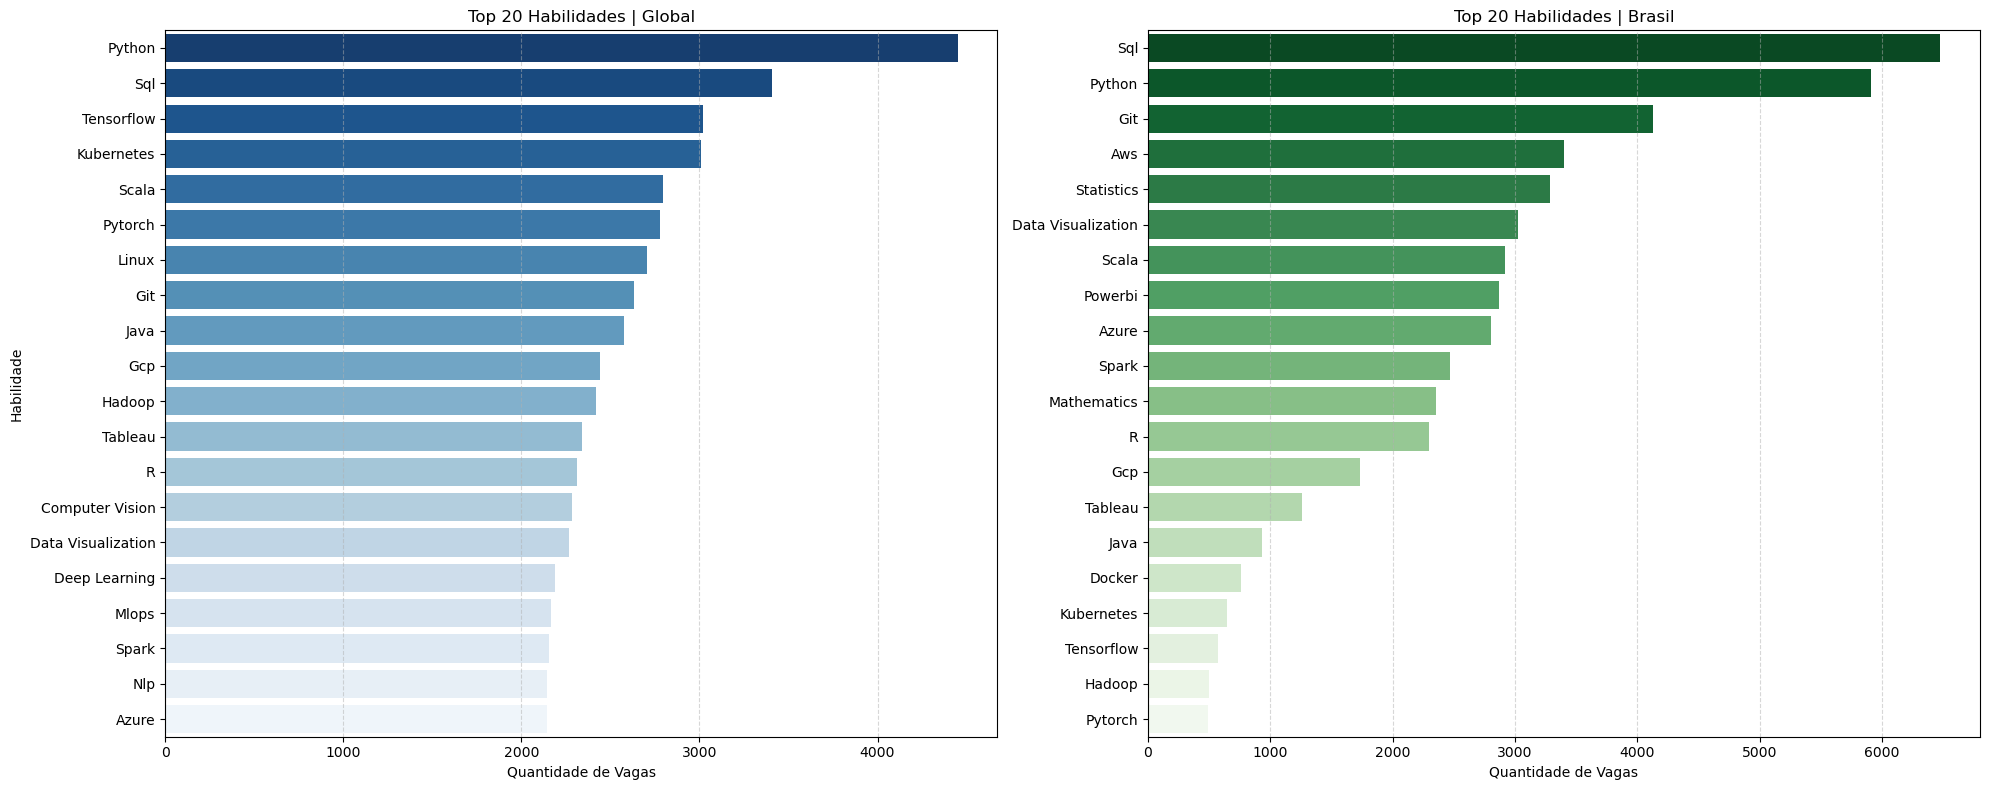

In [34]:
# ================================
# Preparação dos dados
# ================================
# Gerar o DataFrame original
df_unificado_global = df_unificado.loc[df_unificado['company_location'] != 'Brasil']
df_unificado_brasil = df_unificado.loc[df_unificado['company_location'] == 'Brasil']

# Gerar skills globais e brasileiras
df_unificado_global = GeradorSkillsPorCategoria(df_unificado_global, 'job_title')
df_unificado_brasil = GeradorSkillsPorCategoria(df_unificado_brasil, 'job_title')

df_required_global = df_unificado_global.gerar()
df_required_brasil = df_unificado_brasil.gerar()

# Agrupar e somar habilidades - Global
df_required_global = (
    df_required_global
    .groupby('required_skill')['qtd']
    .sum()
    .reset_index()
    .sort_values(by='qtd', ascending=False)
    .head(20)
)

# Agrupar e somar habilidades - Brasil
df_required_brasil = (
    df_required_brasil
    .groupby('required_skill')['qtd']
    .sum()
    .reset_index()
    .sort_values(by='qtd', ascending=False)
    .head(20)
)

# ================================
# Criar gráficos lado a lado
# ================================
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Gráfico Global
sns.barplot(data=df_required_global, y='required_skill', x='qtd', palette='Blues_r', ax=axs[0])
axs[0].set_title('Top 20 Habilidades | Global')
axs[0].set_xlabel('Quantidade de Vagas')
axs[0].set_ylabel('Habilidade')
axs[0].grid(axis='x', linestyle='--', alpha=0.5)

# Gráfico Brasil
if not df_required_brasil.empty:
    sns.barplot(data=df_required_brasil, y='required_skill', x='qtd', palette='Greens_r', ax=axs[1])
    axs[1].set_title('Top 20 Habilidades | Brasil')
    axs[1].set_xlabel('Quantidade de Vagas')
    axs[1].set_ylabel('')
    axs[1].grid(axis='x', linestyle='--', alpha=0.5)
else:
    axs[1].text(0.5, 0.5, 'Sem dados para o Brasil', ha='center', va='center', fontsize=14)
    axs[1].set_axis_off()

plt.tight_layout()
plt.show()


### 0️⃣3️⃣🆗 Conclusão

- É indiscutivel que tanto para o Global quanto para o Brasil, as principais habilidades requisitadas tanto para IA quanto para Dados é `Python` e `SQL`.

- Depois das duas primeiras, notamos algumas diferenças interessantes de um para outro. No Global, percebe-se uma demanda alta de habilidades em `TensowFlow` e `Kubernetes`, enquanto no Brasil uma demanda maior por `Git` e `AWS`.

- Em termos de Ferramentas de Cloud, no Global não há uma demanda alta por AWS assim como no Brasil. Parecem ter mais interesse nas ferramentas Google (`GLP`)

### 4️⃣ Quais habilidades requeridas para a área de Dados? Tanto nacional quanto Global?

✅ DataFrame de skills por 'job_title' gerado com sucesso.
✅ DataFrame de skills por 'job_title' gerado com sucesso.
✅ DataFrame de skills por 'job_title' gerado com sucesso.
✅ DataFrame de skills por 'job_title' gerado com sucesso.
✅ DataFrame de skills por 'job_title' gerado com sucesso.
✅ DataFrame de skills por 'job_title' gerado com sucesso.


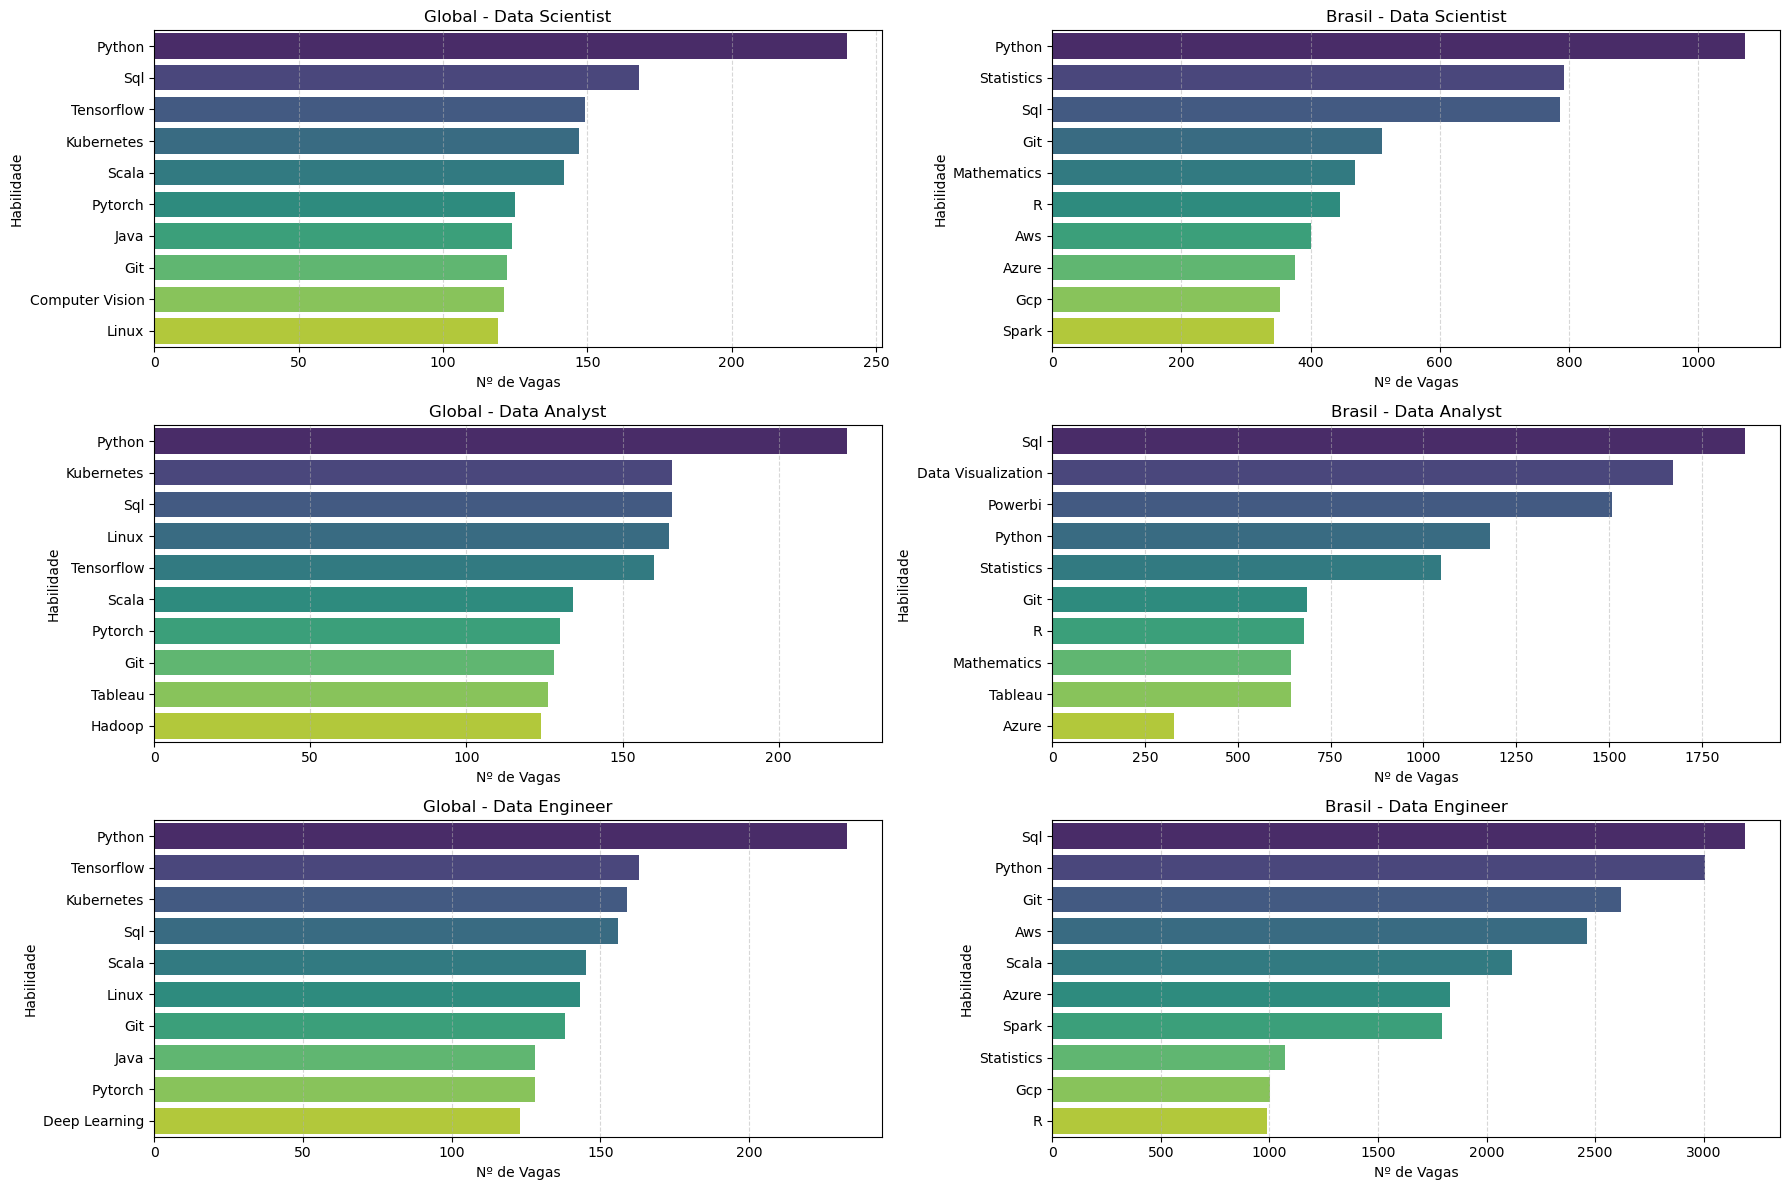

In [35]:
# Passo 1: Filtrar e agregar as habilidades por área
def preparar_top_habilidades(df_global, cargo, top_n=10):
    df_filtrado = df_global[df_global['job_title'] == cargo]
    df_agg = (
        df_filtrado
        .groupby('required_skill')['qtd']
        .sum()
        .reset_index()
        .sort_values(by='qtd', ascending=False)
        .head(top_n)
    )
    return df_agg


# Passo 2: Criar os três DataFrames
df_global_ds = preparar_top_habilidades(df_unificado_global.gerar(), 'Data Scientist')
df_global_da = preparar_top_habilidades(df_unificado_global.gerar(), 'Data Analyst')
df_global_de = preparar_top_habilidades(df_unificado_global.gerar(), 'Data Engineer')

df_brasil_ds = preparar_top_habilidades(df_unificado_brasil.gerar(), 'Data Scientist')
df_brasil_da = preparar_top_habilidades(df_unificado_brasil.gerar(), 'Data Analyst')
df_brasil_de = preparar_top_habilidades(df_unificado_brasil.gerar(), 'Data Engineer')

# Passo 3: Criar os gráficos lado a lado
fig, axs = plt.subplots(3, 2, figsize=(18, 12))

def plotar(ax, df_plot, titulo):
    sns.barplot(data=df_plot, y='required_skill', x='qtd', palette='viridis', ax=ax)
    ax.set_title(titulo)
    ax.set_xlabel('Nº de Vagas')
    ax.set_ylabel('Habilidade')
    ax.grid(axis='x', linestyle='--', alpha=0.5)

# Plotar cada gráfico
# Global (coluna 0)
plotar(axs[0,0], df_global_ds, 'Global - Data Scientist')
plotar(axs[1,0], df_global_da, 'Global - Data Analyst')
plotar(axs[2,0], df_global_de, 'Global - Data Engineer')

# Brasil (coluna 1)
plotar(axs[0,1], df_brasil_ds, 'Brasil - Data Scientist')
plotar(axs[1,1], df_brasil_da, 'Brasil - Data Analyst')
plotar(axs[2,1], df_brasil_de, 'Brasil - Data Engineer')


plt.tight_layout()
plt.show()


In [42]:
#Filtrar todas as vagas de Engenheiro de Dados

df_global = df_unificado.loc[df_unificado['company_location'] != 'Brasil']

total_vagas_DE = df_global[df_global['job_title'] == 'Data Engineer'].shape[0]

# Filtrar Data Engineer e que na required_skills tenha os textos 'AWS' ou 'Azure' ou 'GCP'

total_vagas_DE_com_Cloud = df_global[df_global['job_title'] == 'Data Engineer'].loc[df_global['required_skills'].str.contains('AWS|Azure|GCP')].shape[0]

print(r'Total de vagas de Engenheiro de Dados que demandam Cloud:', format(total_vagas_DE_com_Cloud / total_vagas_DE, '.2%'))

Total de vagas de Engenheiro de Dados que demandam Cloud: 36.85%


### 0️⃣4️⃣🆗 Conclusão

- Sem dúvidas, o **`Python` e `SQL` são as habilidades mais requisitadas** entre todas as outras habilidades em geral.

- Entretanto, as habilidades do Global não parecem me convencer em nenhuma das áreas. Olhando para as vagas separadamente

1. Data Scientist
    - No Brasil fortemente habilidade em Python, e em seguida aparecem habilidades como Matemática e Estatistica, além de SQL.
    - No Global, notamos Python e SQL como habilidades principais, mas em seguida pedem TensowFlow e Kubernetes, e não é citado Matemática ou Estatistica nas top 10 habilidades dessa área

2. Data Analyst
    - No Brasil, o Python deixa de ser uma das habilidades mais importantes, e dá espaço para Data Visualization e PowerBI, e mantendo SQL como habilidade mais importante para essa área.
    - Com relação ao Global, Python lidera como habilidade mais requisitada pra área, e novamente Kubernetes é citada, e surge também Linux como requisição.

3. Data Engineer
    - No Brasil, além das habilidades de `Python` e `SQL`, vemos habilidades como Git e AWS se destacando. Não tão distante vemos a seguir também a `Azure` e `Spark` que também são comumente utilizadas.
    - No Global, vemos novamente ferramentas como `Tensorflow` e `Kubernetes` sendo mencionadas, e nenhuma ferramenta de Cloud nas top 10 habilidades.
    - Aplicamos um filtro para identificar quantas vagas de `Data Engineer` solicitam ao menos uma habilidade cloud (`'AWS|Azure|GCP'`) e o resultado deixou preocupado:
        - `Total de vagas de Engenheiro de Dados que demandam Cloud: 36.85%`


Esse resultado gera algumas duvidas, e a interpretação que fica é:
- Ou os dados foram sintetizados/manipulados.
- Ou então os recrutadores (como normalmente acontece aqui também) não souberam informar as habilidades corretas para aquela vaga específica, e então "poluiu" a análise.

### 0️⃣5️⃣ Qual Nivel de Escolaridade cada um dos Segmentos Industriais estão requisitando?

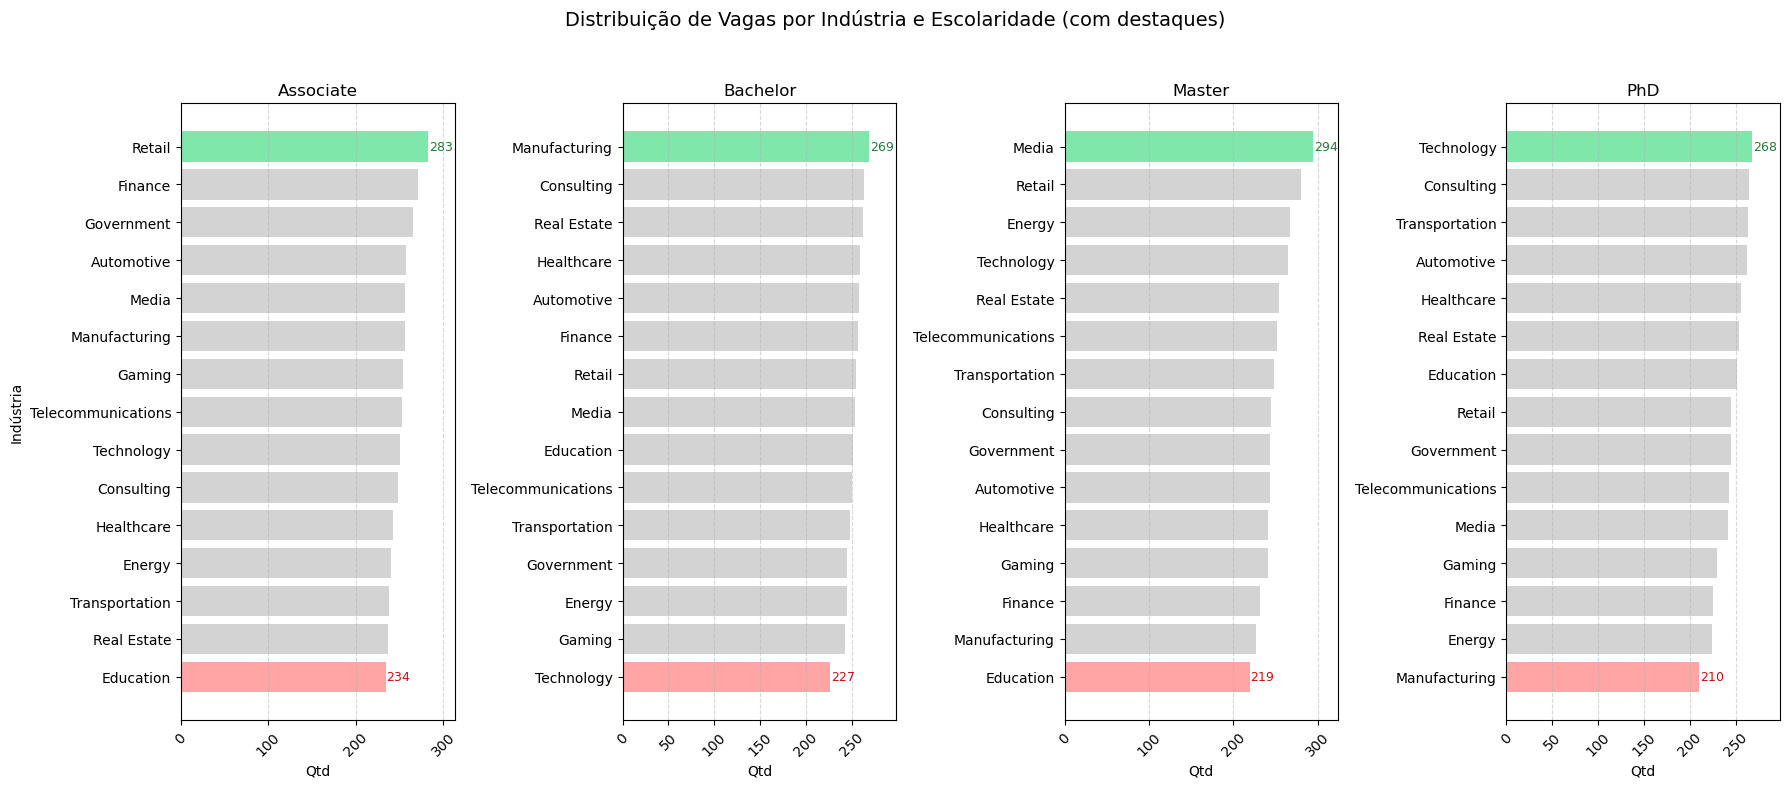

In [ ]:
# Reaproveitar o agrupamento
df_agrupado = df_unificado.groupby(['education_required', 'industry']).size().reset_index(name='qtd')

# Obter as categorias únicas
escolaridades = df_agrupado['education_required'].unique()

# Criar o gráfico
plt.figure(figsize=(18, 8))

for i, escolaridade in enumerate(escolaridades):
    subset = df_agrupado[df_agrupado['education_required'] == escolaridade].sort_values('qtd', ascending=True)

    plt.subplot(1, len(escolaridades), i + 1)

    # Cores padrão: cinza
    colors = ['lightgray'] * len(subset)

    # Destaque para o maior (verde) e menor (vermelho)
    idx_max = subset['qtd'].idxmax()
    idx_min = subset['qtd'].idxmin()

    max_ind = subset.index.get_loc(idx_max)
    min_ind = subset.index.get_loc(idx_min)

    colors[max_ind] = '#80E7AB'
    colors[min_ind] = '#FFA5A5'

    bars = plt.barh(subset['industry'], subset['qtd'], color=colors)
    plt.title(escolaridade)
    plt.xlabel('Qtd')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.xlim(0, subset['qtd'].max() + 30)  # ← Aqui você afasta a borda do gráfico


    if i == 0:
        plt.ylabel('Indústria')
    else:
        plt.ylabel('')
    plt.xticks(rotation=45)

    # Adicionar os valores apenas nas barras em destaque
    # Adicionar os valores apenas nas barras em destaque
    for j, bar in enumerate(bars):
        if j == max_ind:
            cor = '#1F7D35'  # mesma do verde claro
        elif j == min_ind:
            cor = '#CF0E0E'  # mesma do vermelho claro
        else:
            continue

        plt.text(bar.get_width() + 1,
                bar.get_y() + bar.get_height() / 2,
                f'{int(bar.get_width())}',
                va='center',
                fontsize=9,
                color=cor)  # ← aqui aplicamos a cor no texto


plt.suptitle('Distribuição de Vagas por Indústria e Escolaridade (com destaques)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()